In [4]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

plt.rcParams['figure.figsize'] = [16, 4]
from plot_utils import *

In [5]:
def plot_one_pval_TE_final(ax,run_list,main_enum,pval_list,fname_pattern,debug_tidx,rr_lambda,reg_lambda,tmle_lambda,l2_lambda,noise,topic_name,tidx,hlayer=None,num_sample=None,plot_upto=-1,plot_per_idx=1):
    #Getting the result dict
    result_dict = get_all_result_dict(
                        run_list=run_list,
                        pval_list=pval_list,
                        enum=main_enum,
                        fname_pattern=fname_pattern.format(
                                                    "{1}",
                                                    num_sample,
                                                    hlayer,
                                                    "{0}",
                                                    debug_tidx,
                                                    rr_lambda,
                                                    reg_lambda,
                                                    tmle_lambda,
                                                    l2_lambda,
                                                    noise,
                                                    topic_name,
                        )
    )

    
    #Plotting the result
    for pidx,plot_item in enumerate(plot_item_list):
        
        #Plotting the results
        item_yval = np.array([result_dict[pval][plot_item]["mean"] for pval in pval_list])
        #yerr=[0.0]*len(item_yval)
        yerr = np.array([result_dict[pval][plot_item]["std"] for pval in pval_list])
        #Plotting the item
        
        ax[pidx].plot(pval_list,item_yval,label="topic={}".format(debug_tidx),ls="-.",marker="o",alpha=0.7)
        ax[pidx].fill_between(pval_list,item_yval-yerr,item_yval+yerr,alpha=0.3)
        ax[pidx].set_xlabel("expt")
        if "te" in plot_item:
            ax[pidx].set_ylim(-0.3,0.3)
        
        ax[pidx].set_ylabel(plot_item)
        
        ax[pidx].legend()
        ax[pidx].grid(True)

In [6]:
def plot_one_pval_TE_timeline(ax,run_list,main_enum,pval_list,fname_pattern,debug_tidx,rr_lambda,reg_lambda,tmle_lambda,l2_lambda,noise,topic_name,replace_strategy,tidx,hlayer=None,num_sample=None,plot_upto=-1,plot_per_idx=1,teulim=None,tellim=None):
    #Getting the metrics
    if replace_strategy!=None:
        result_dict_timeline = get_all_result_timeline(
                            run_list=run_list,
                            pval_list=pval_list,
                            fname_pattern=fname_pattern.format(
                                                        "{1}",
                                                        num_sample,
                                                        hlayer,
                                                        "{0}",
                                                        debug_tidx,
                                                        rr_lambda,
                                                        reg_lambda,
                                                        tmle_lambda,
                                                        l2_lambda,
                                                        noise,
                                                        topic_name,
                                                        replace_strategy,
                            )
        )
    else:
        result_dict_timeline = get_all_result_timeline(
                            run_list=run_list,
                            pval_list=pval_list,
                            fname_pattern=fname_pattern.format(
                                                        "{1}",
                                                        num_sample,
                                                        hlayer,
                                                        "{0}",
                                                        debug_tidx,
                                                        rr_lambda,
                                                        reg_lambda,
                                                        tmle_lambda,
                                                        l2_lambda,
                                                        noise,
                                                        topic_name,
                            )
        )

    for pidx,plot_item in enumerate(plot_item_list):
        for pval in pval_list:
            #Getting the timeline item
            item_pval_yval_timeline = result_dict_timeline[pval][plot_item]["mean"].tolist()
            yerr=[0.0]*len(item_pval_yval_timeline)
            xval = list(range(len(item_pval_yval_timeline)))

            #Plotting the item
            ax[pidx,tidx].errorbar(xval[:plot_upto][::plot_per_idx],item_pval_yval_timeline[:plot_upto][::plot_per_idx],yerr[:plot_upto][::plot_per_idx],label="pval={}".format(pval),ls="-.",marker="o",alpha=0.7)
#             ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)

            ax[pidx,tidx].set_xlabel("epoch")
            ax[pidx,tidx].set_ylabel(plot_item)
            
            ax[pidx,tidx].set_xticks(xval[:plot_upto][::plot_per_idx])
            if "te" in plot_item and (teulim!=None and tellim!=None):
                ax[pidx,tidx].set_ylim(tellim,teulim)
            
            if "acc" in plot_item:
                ax[pidx,tidx].set_ylim(0.5,1.0)
            
            if plot_item=="reg_loss_valid":
                ax[pidx,tidx].legend(loc=1)
            elif plot_item=="te_valid":
                ax[pidx,tidx].legend(loc=1)
            else:
                ax[pidx,tidx].legend()
            ax[pidx,tidx].grid(True)
            
            ax[pidx,tidx].set_title("topic={}, l2={}".format(topic_name,l2_lambda))
#             ax[pidx,tidx].set_title("l2_lambda="+str(l2_lambda))
            
            
#             plot_per_idx=plot_per_idx
#             ax[pidx,].errorbar(xval[:plot_upto][::plot_per_idx],item_pval_yval_timeline[:plot_upto][::plot_per_idx],yerr[:plot_upto][::plot_per_idx],label="pval={}".format(pval),ls="-.",marker="o",alpha=0.7)
#             #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)

#             ax[pidx,].set_xlabel("epoch")
#             ax[pidx,].set_ylabel(plot_item)

#             ax[pidx,].legend()
#             ax[pidx,].grid(True)
            
#             ax[pidx,].set_title("topic="+topic_name)
            

# CeBAB Dataset

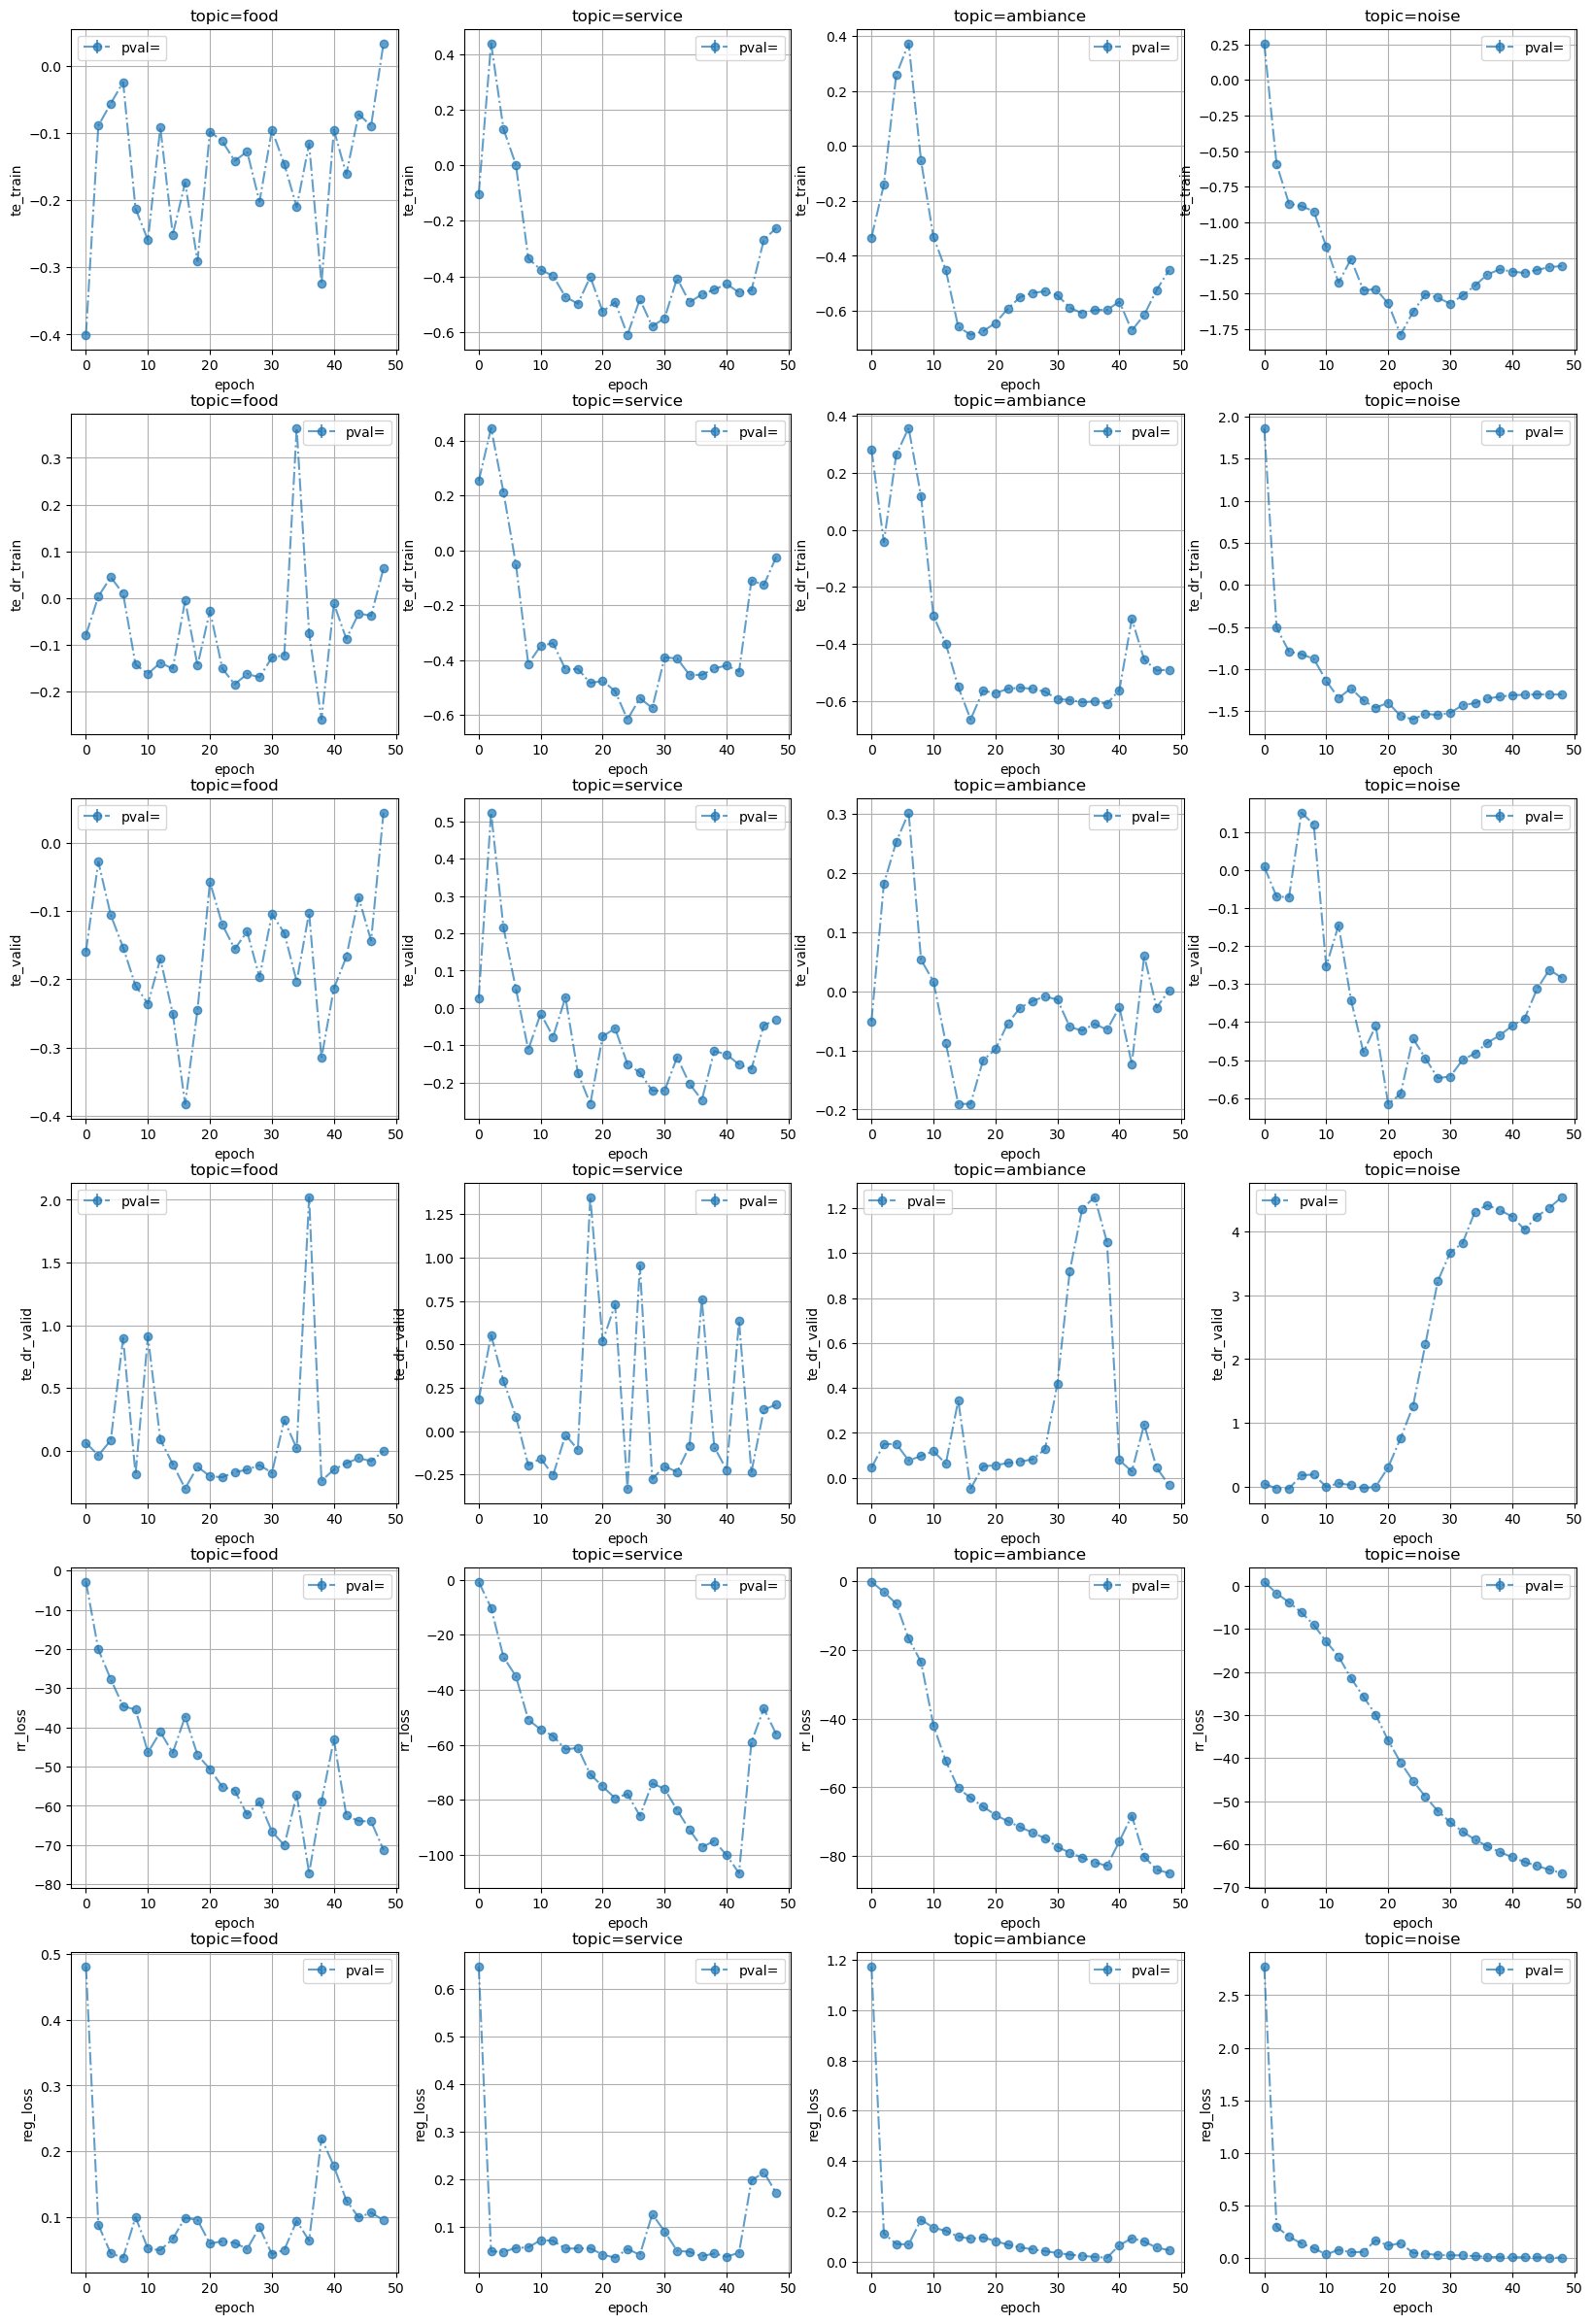

In [23]:
run_list=[1,]
main_enum=50
hlayer=0

rr_lambda=1
reg_lambda=1
tmle_lambda=0
l2_lambda=0.0
# debug_tidx_list=[0,1]
topic_list=["food","service","ambiance","noise"]
num_sample_list=[750,500,200,65]
debug_tidx=0

pval_list=[""]
# degree_confoundedness=0.0

noise=0.0

plot_item_list=[
            "te_train",
#             "te_corr_train",
            "te_dr_train",
            "te_valid",
#             "te_corr_valid",
            "te_dr_valid",
            "rr_loss",
            "reg_loss",
#             "tmle_loss",
#             "l2_loss",
#             "alpha:tdtidx0-tcf0",
#             "alpha:tdtidx0-tcf1",
#             "alpha:tdtidx1-tcf0",
#             "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [20, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(topic_list))

tidx=0
for topic_name,num_sample in zip(topic_list,num_sample_list):
    fname_pattern= "dataset/cebab/nlp_logs/cad.cebabs1riesz.rnum({}).sample({}).hlayer({}).pvaltsp({}).dtidx({}).rr_lmd({}).reg_lmd({}).tmle_lmd({}).l2_lmd({}).dcf().noise({}).topic({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           pval_list=pval_list,
                           hlayer=hlayer,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           reg_lambda=reg_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda,
                           noise=noise,
                           topic_name=topic_name,
                           tidx=tidx,
    )
    tidx+=1

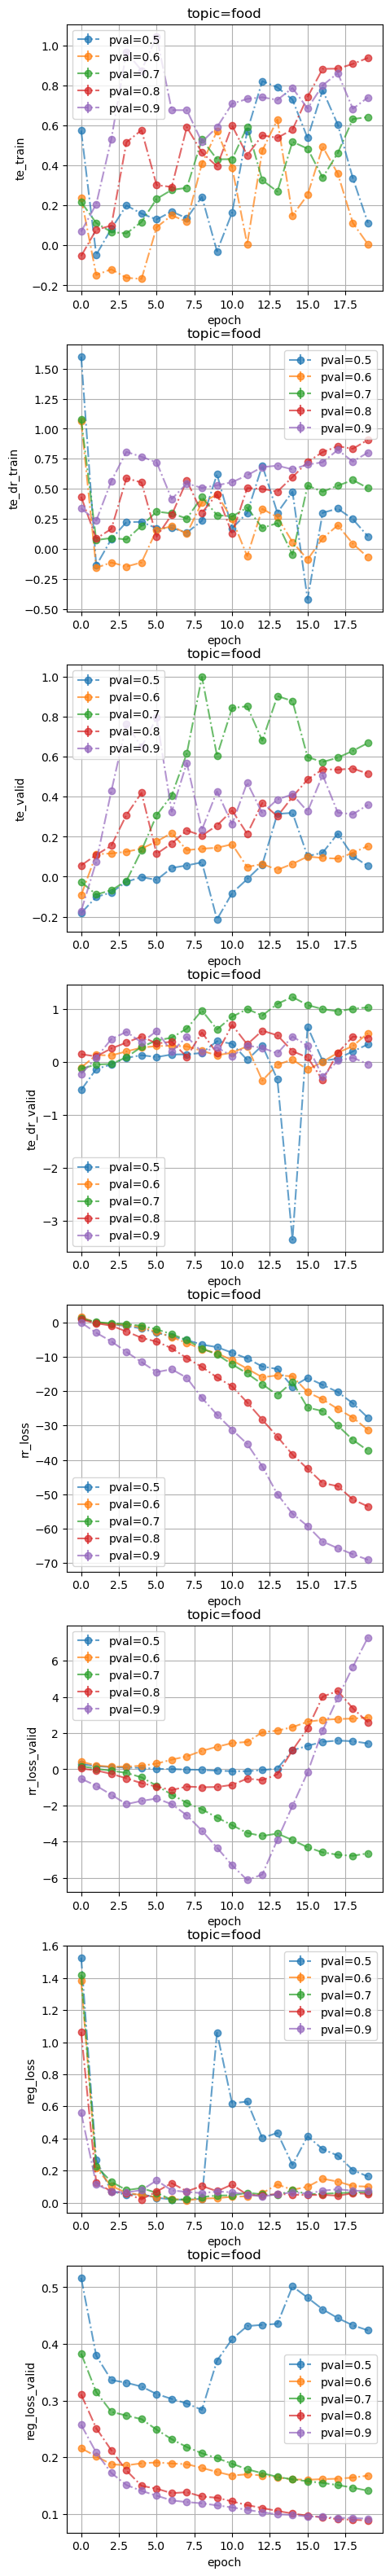

In [24]:
run_list=[3,]
main_enum=20
hlayer=0

rr_lambda=1
reg_lambda=1
tmle_lambda=0
l2_lambda = 0.0
# debug_tidx_list=[0,1]
topic_list=["food",]
num_sample_list=[350,]
debug_tidx=0

pval_list=[0.5,0.6,0.7,0.8,0.9]
# degree_confoundedness=0.0

noise=0.0

plot_item_list=[
            "te_train",
#             "te_corr_train",
            "te_dr_train",
            "te_valid",
#             "te_corr_valid",
            "te_dr_valid",
            "rr_loss",
            "rr_loss_valid",
            "reg_loss",
            "reg_loss_valid",
#             "tmle_loss",
#             "l2_loss",
#             "alpha:tdtidx0-tcf0",
#             "alpha:tdtidx0-tcf1",
#             "alpha:tdtidx1-tcf0",
#             "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [5, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(topic_list))

tidx=0
for topic_name,num_sample in zip(topic_list,num_sample_list):
    fname_pattern= "dataset/cebab/nlp_logs/cad.cebabs1riesz.rnum({}).sample({}).hlayer({}).pval({}).dtidx({}).rr_lmd({}).reg_lmd({}).tmle_lmd({}).l2_lmd({}).dcf().noise({}).topic({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           pval_list=pval_list,
                           hlayer=hlayer,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           reg_lambda=reg_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda,
                           noise=noise,
                           topic_name=topic_name,
                           tidx=tidx,
                           plot_upto=20,
                           plot_per_idx=1,
    )
    tidx+=1

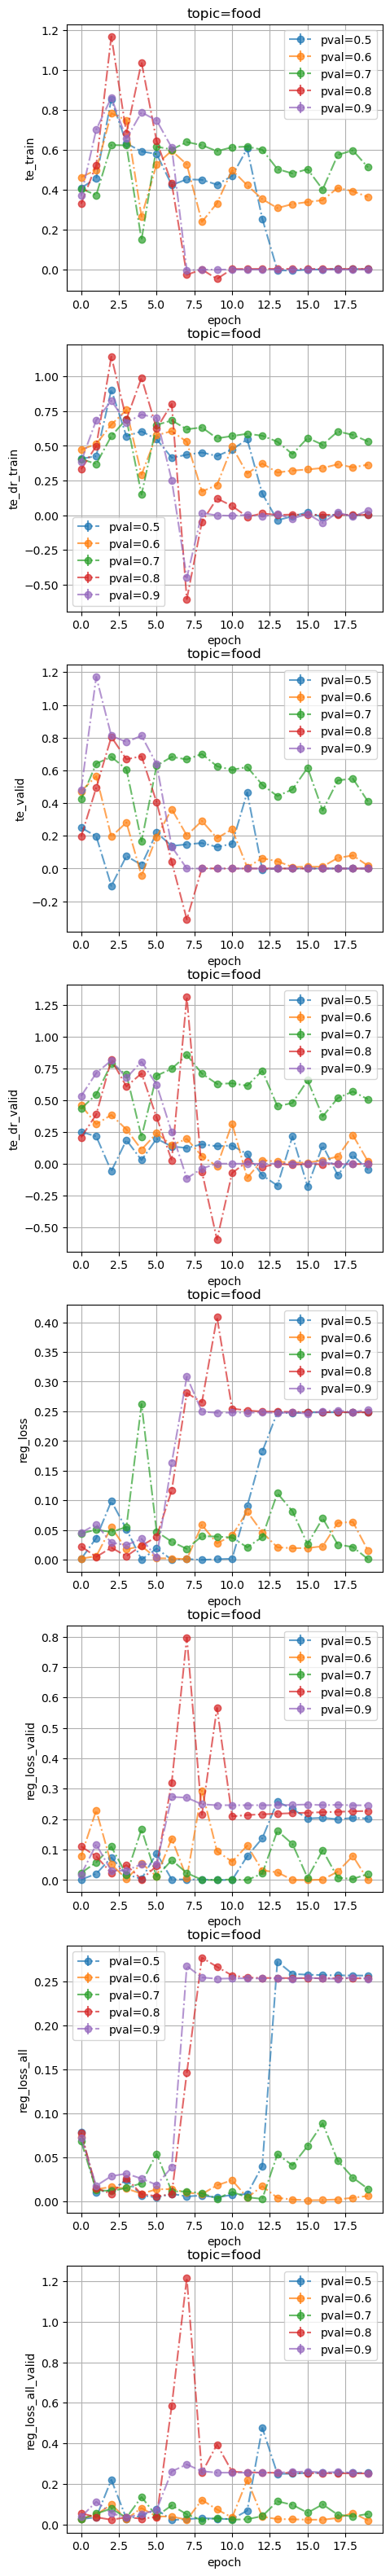

In [20]:
run_list=[5,]
main_enum=20
hlayer=0

rr_lambda=1
reg_lambda=1
tmle_lambda=0
l2_lambda = 0.0
# debug_tidx_list=[0,1]
topic_list=["food",]
num_sample_list=[350,]
debug_tidx=0

pval_list=[0.5,0.6,0.7,0.8,0.9]
# degree_confoundedness=0.0

noise=0.0

plot_item_list=[
            "te_train",
#             "te_corr_train",
            "te_dr_train",
            "te_valid",
#             "te_corr_valid",
            "te_dr_valid",
#             "rr_loss",
#             "rr_loss_valid",
            "reg_loss",
            "reg_loss_valid",
            "reg_loss_all",
            "reg_loss_all_valid",
#             "tmle_loss",
#             "l2_loss",
#             "alpha:tdtidx0-tcf0",
#             "alpha:tdtidx0-tcf1",
#             "alpha:tdtidx1-tcf0",
#             "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [5, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(topic_list))

tidx=0
for topic_name,num_sample in zip(topic_list,num_sample_list):
    fname_pattern= "dataset/cebab/nlp_logs/cad.cebabs1riesz.rnum({}).sample({}).hlayer({}).pval({}).dtidx({}).rr_lmd({}).reg_lmd({}).tmle_lmd({}).l2_lmd({}).dcf().noise({}).topic({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           pval_list=pval_list,
                           hlayer=hlayer,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           reg_lambda=reg_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda,
                           noise=noise,
                           topic_name=topic_name,
                           tidx=tidx,
                           plot_upto=20,
                           plot_per_idx=1,
    )
    tidx+=1

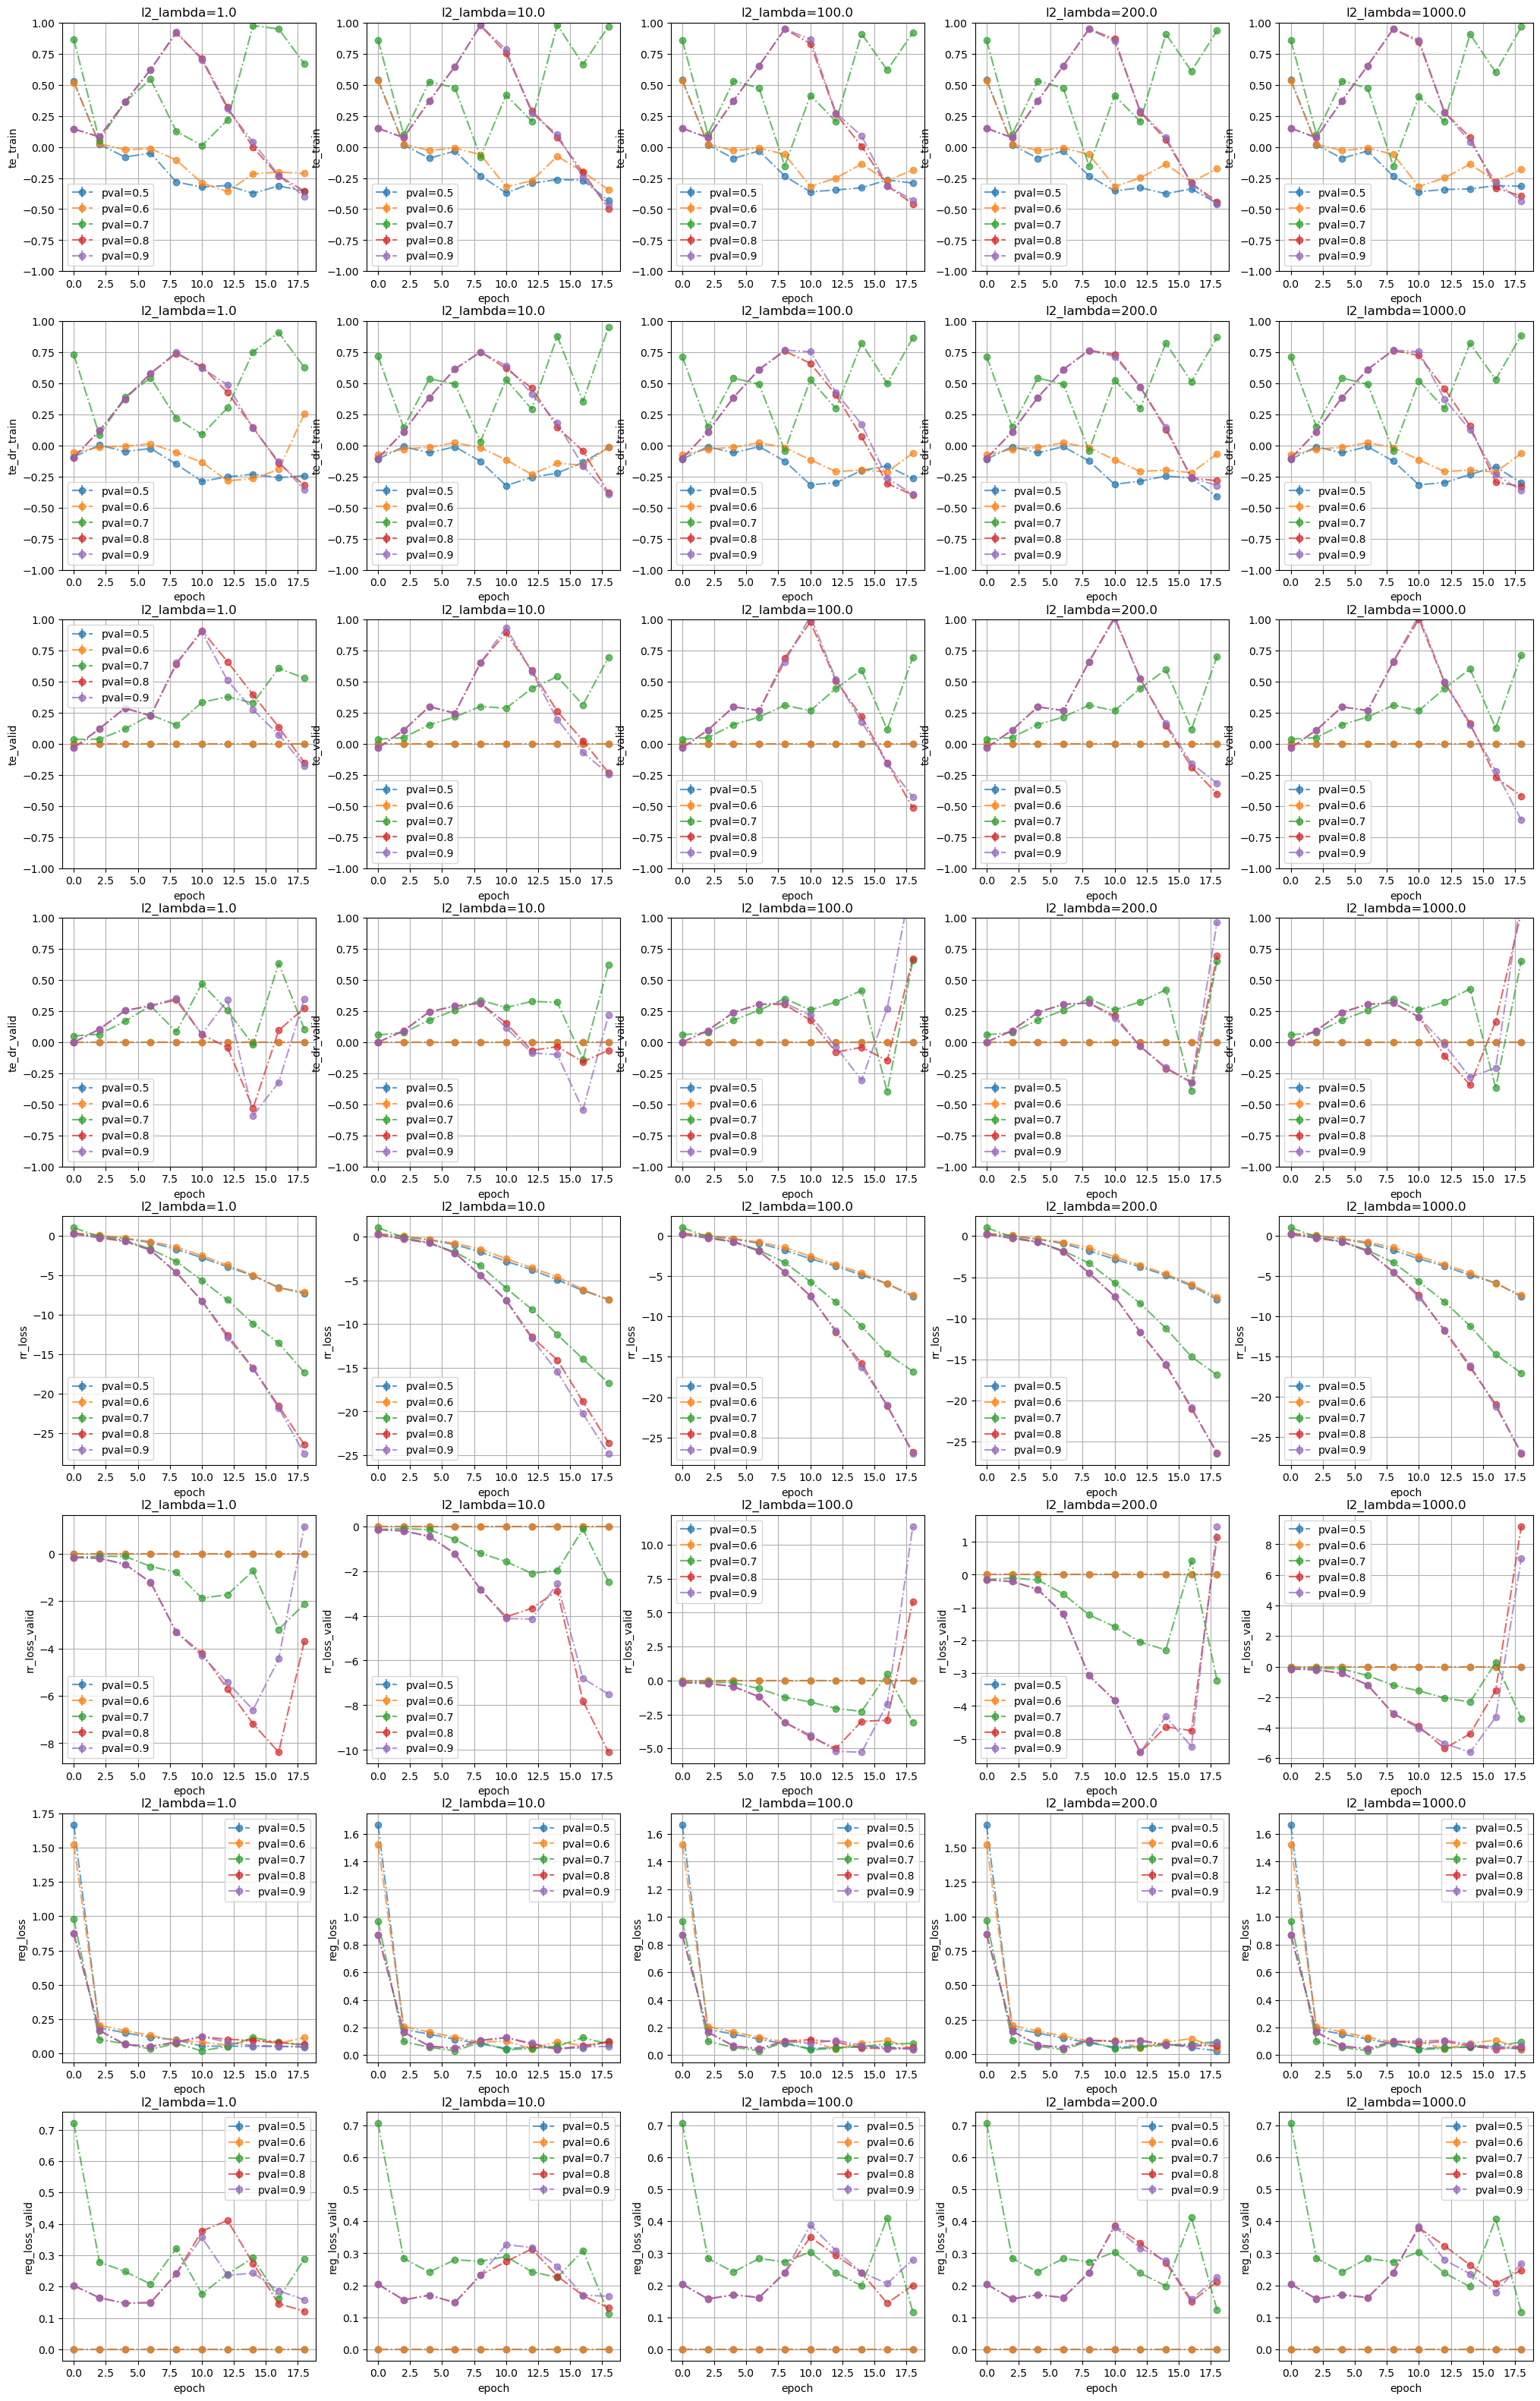

Bad pipe message: %s [b':\rte\x95 c\x8f\xe8\t\x01\xd6O\xde\xf0\xc3T\x10 F\x14C\x87\xe1\xfaa\x1c\x89\xe0h\xcd\xe9\x89\xc3\xe5\xafm\xd6\x0b{\x14\xe9vv\xf53L]%\xa5\x01\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t1', b'.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04', b'\x03\x06', b'\x07\x08']
Bad pipe message: %s [b'\t\x08\n\x08\x0b\x08\x04']
Bad pipe message: %s [b'\x08\x06\x04\x01\x05\x01\x06', b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 P\x07\x0eQg\xe7\xa3(`1\xe3M\x9d6\x15S\xfe\x84[A\xb1\xdc']
Bad pipe message: %s [b'\xbd\xb1\x0bHM\xeaYCI\xe4\xf8\xb6+\x13"\x84[o\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#

In [30]:
run_list=[8,]
main_enum=20
hlayer=0

rr_lambda=1
reg_lambda=1
tmle_lambda=0
l2_lambda_list=[1.0,10.0,100.0,200.0,1000.0]
topic_name="noise"
num_sample=50
debug_tidx=0

pval_list=[0.5,0.6,0.7,0.8,0.9]
noise=0.0

plot_item_list=[
            "te_train",
#             "te_corr_train",
            "te_dr_train",
            "te_valid",
#             "te_corr_valid",
            "te_dr_valid",
            "rr_loss",
            "rr_loss_valid",
            "reg_loss",
            "reg_loss_valid",
#             "tmle_loss",
#             "l2_loss",
#             "alpha:tdtidx0-tcf0",
#             "alpha:tdtidx0-tcf1",
#             "alpha:tdtidx1-tcf0",
#             "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [5*len(l2_lambda_list), 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(l2_lambda_list))


for lidx,l2_lambda in enumerate(l2_lambda_list):
    fname_pattern= "dataset/cebab/nlp_logs/cad.cebabs1riesz.rnum({}).sample({}).hlayer({}).pval({}).dtidx({}).rr_lmd({}).reg_lmd({}).tmle_lmd({}).l2_lmd({}).dcf().noise({}).topic({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           pval_list=pval_list,
                           hlayer=hlayer,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           reg_lambda=reg_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda,
                           noise=noise,
                           topic_name=topic_name,
                           tidx=lidx,
                           plot_upto=20,
                           plot_per_idx=1,
    )

## After symmetrization of CEBAB dataset

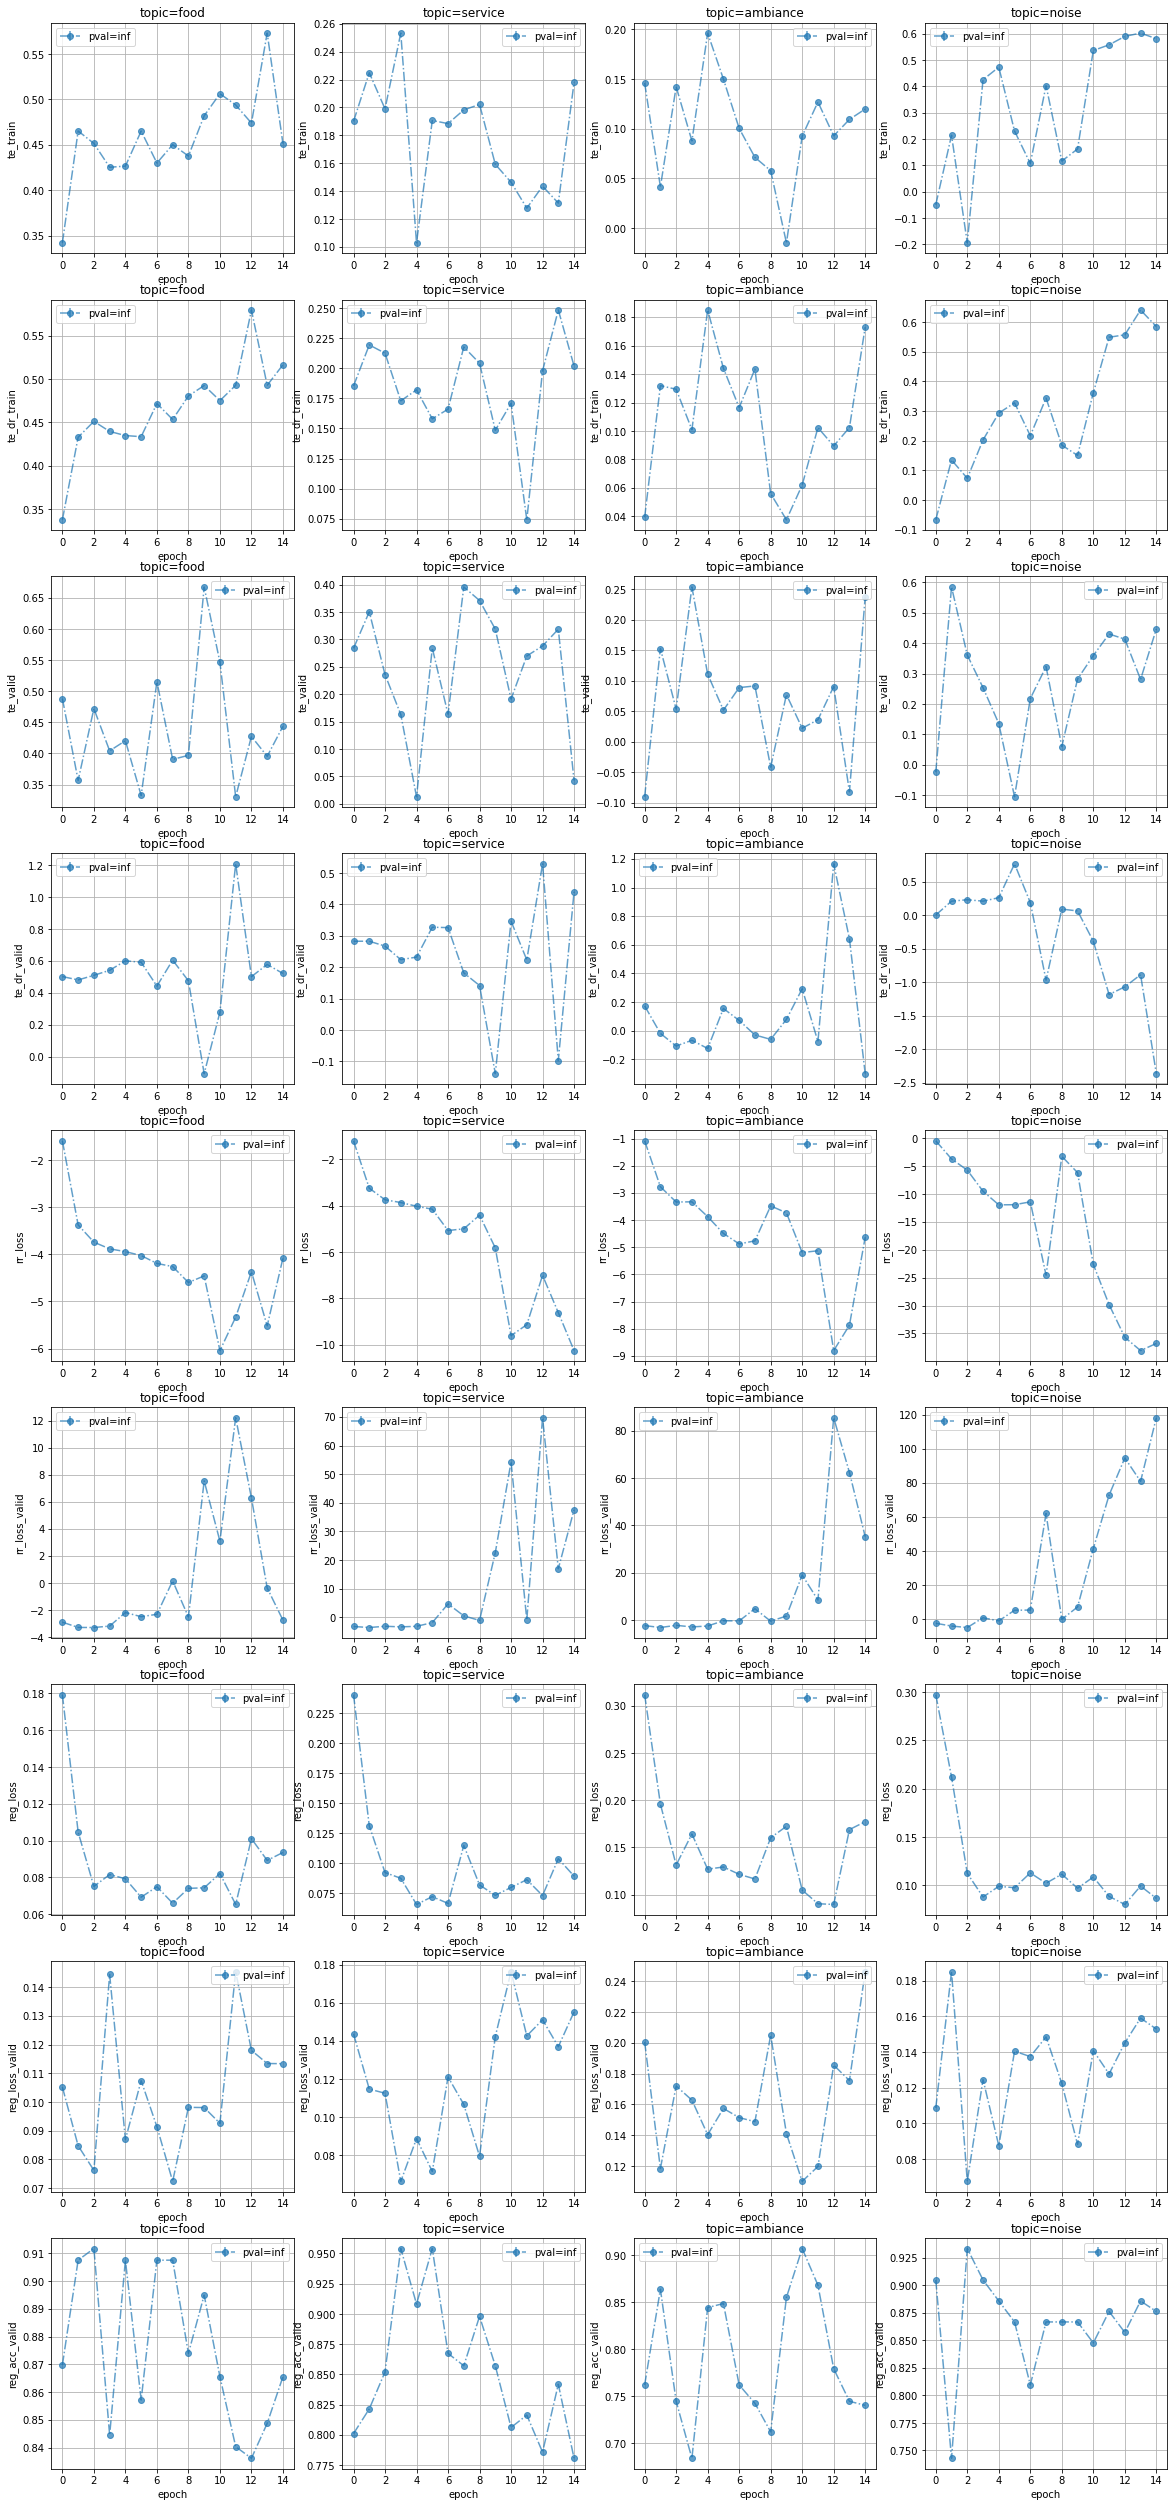

In [49]:
run_list=[8,]
main_enum=20
hlayer=0

rr_lambda=1
reg_lambda=1
tmle_lambda=0
l2_lambda = 0.0
# debug_tidx_list=[0,1]
topic_list=["food","service","ambiance","noise"]
num_sample_list=[1100,900,700,500]
debug_tidx=0


pval_list=["inf"]
# degree_confoundedness=0.0

noise=0.0

plot_item_list=[
            "te_train",
#             "te_corr_train",
            "te_dr_train",
            "te_valid",
#             "te_corr_valid",
            "te_dr_valid",
            "rr_loss",
            "rr_loss_valid",
            "reg_loss",
            "reg_loss_valid",
            "reg_acc_valid",
#             "reg_loss_all",
#             "reg_loss_all_valid",
#             "tmle_loss",
#             "l2_loss",
#             "alpha:tdtidx0-tcf0",
#             "alpha:tdtidx0-tcf1",
#             "alpha:tdtidx1-tcf0",
#             "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [20, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(topic_list))

tidx=0
for topic_name,num_sample in zip(topic_list,num_sample_list):
    fname_pattern= "dataset/cebab/nlp_logs/cad.cebabs1riesz.rnum({}).sample({}).hlayer({}).pval({}).dtidx({}).rr_lmd({}).reg_lmd({}).tmle_lmd({}).l2_lmd({}).dcf().noise({}).topic({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           pval_list=pval_list,
                           hlayer=hlayer,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           reg_lambda=reg_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda,
                           noise=noise,
                           topic_name=topic_name,
                           tidx=tidx,
                           plot_upto=15,
                           plot_per_idx=1,
                           replace_strategy=None,
    )
    tidx+=1

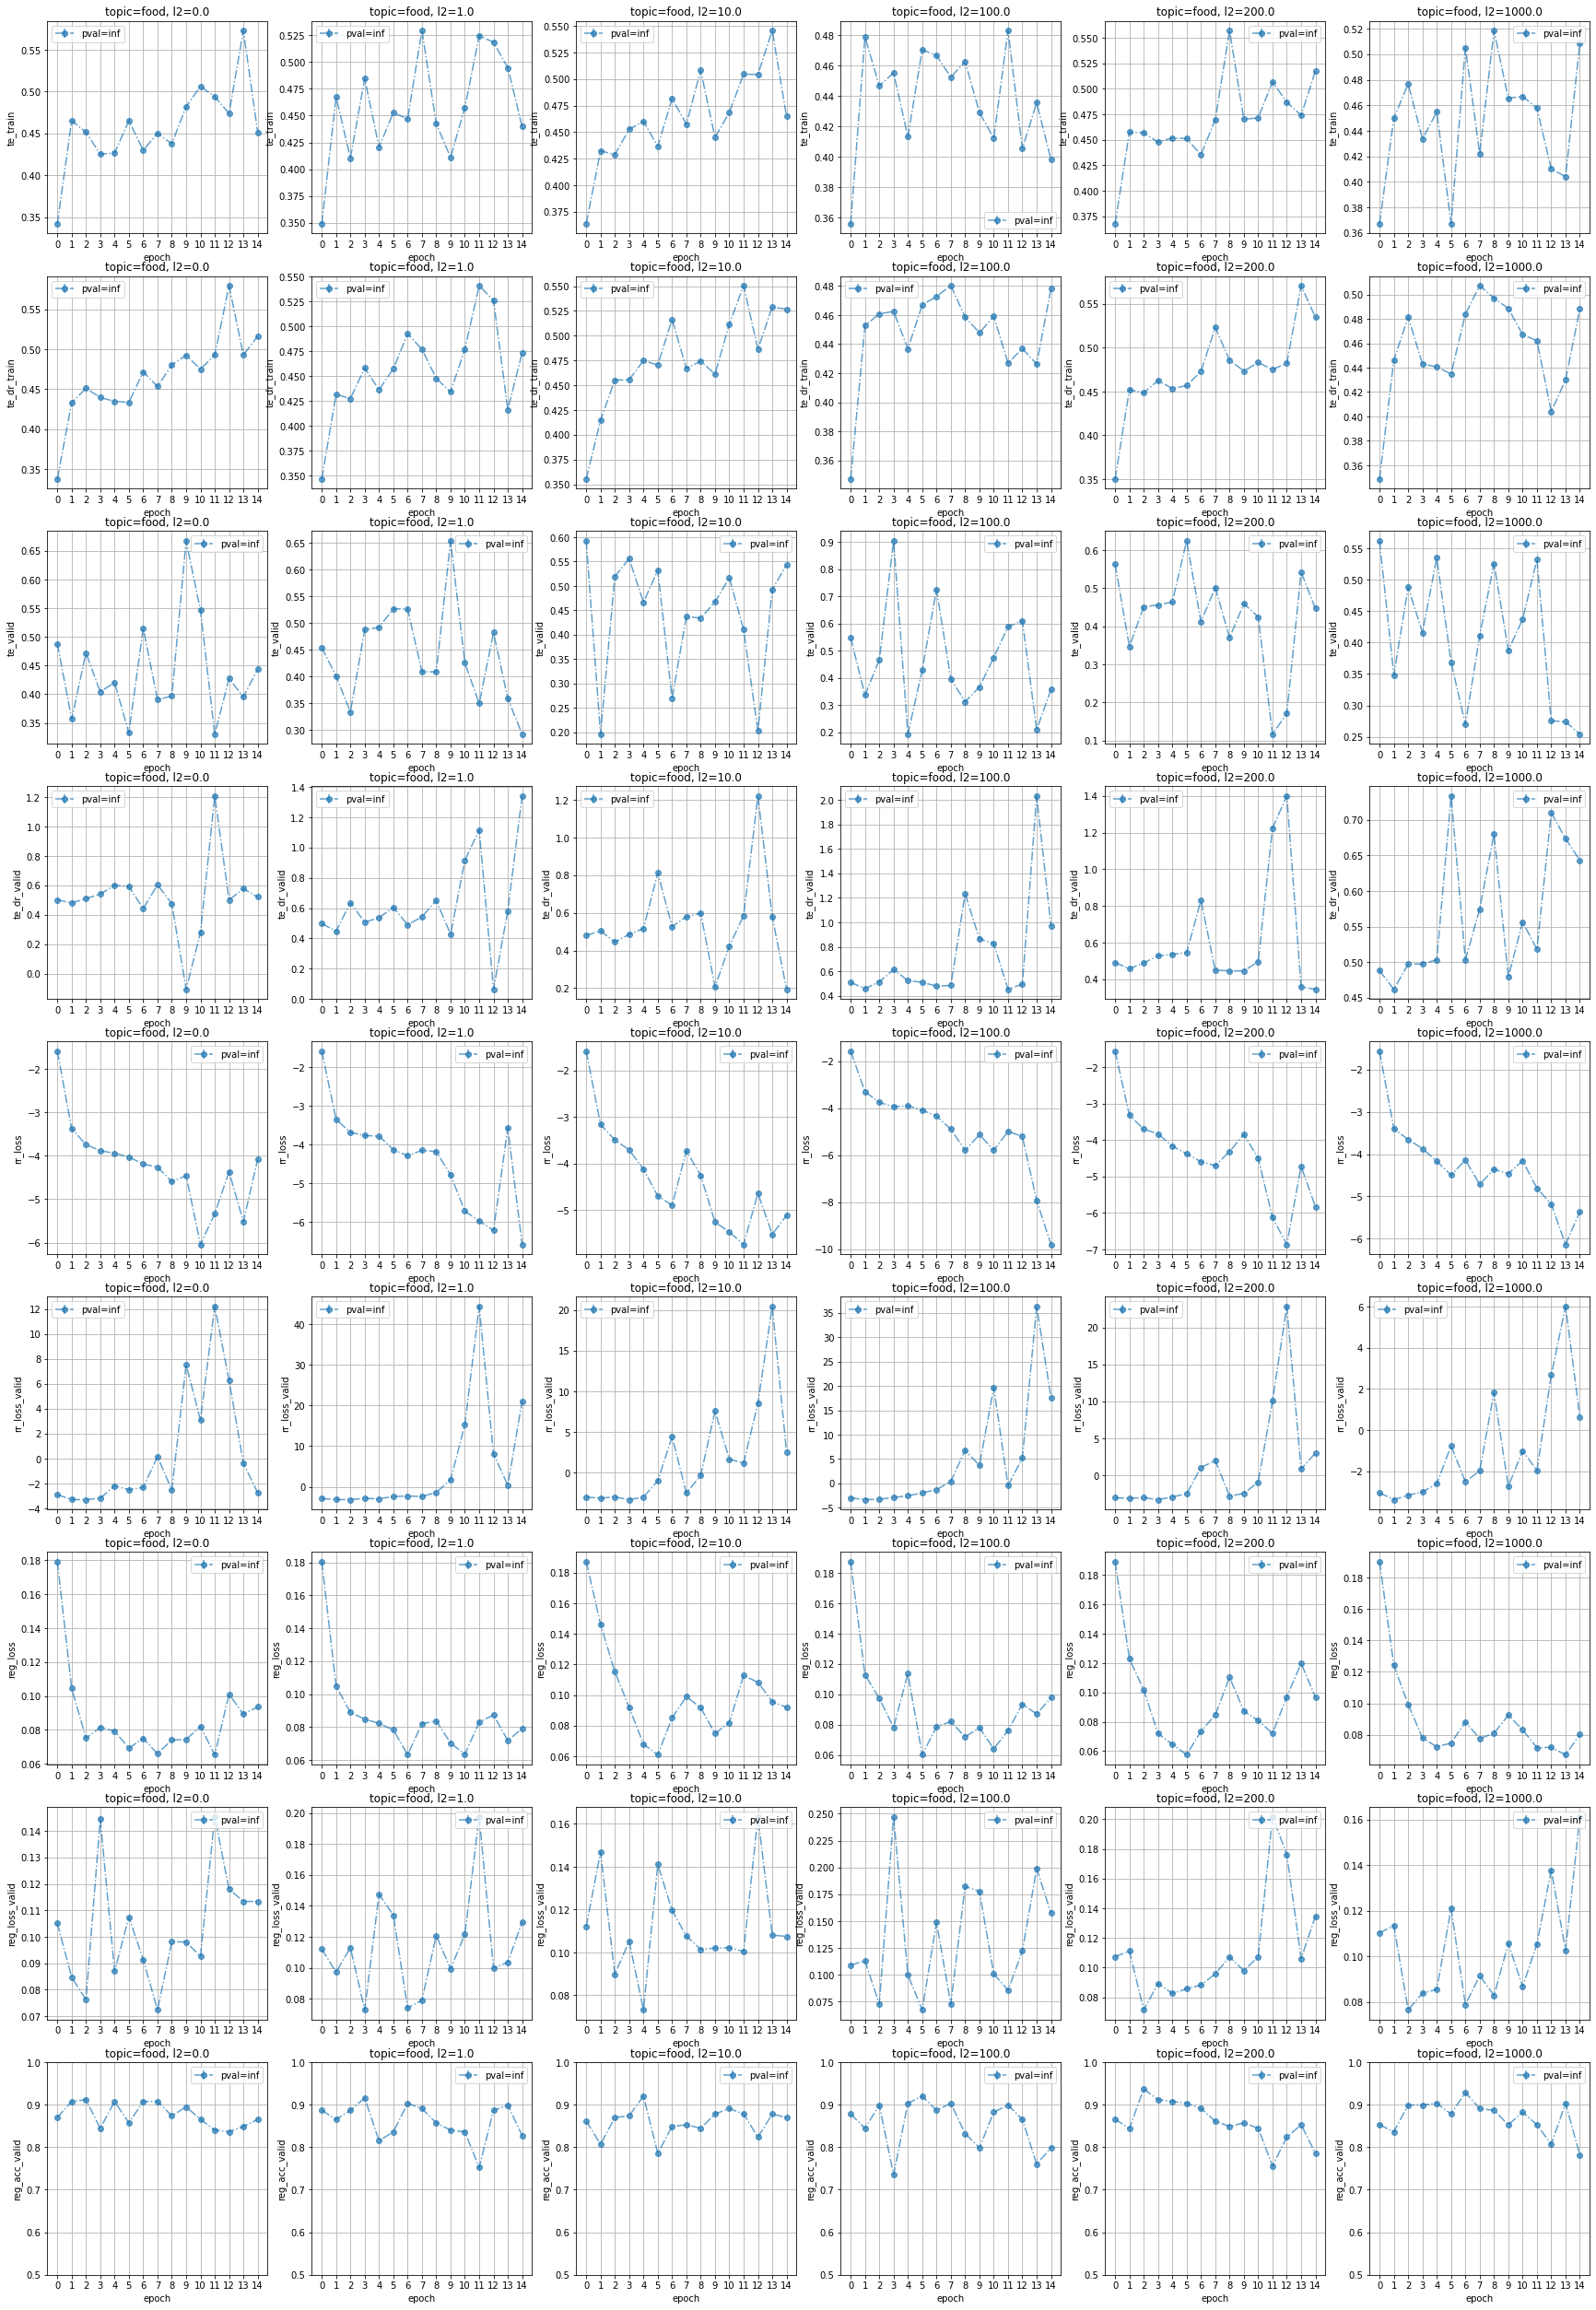

In [13]:
run_list=[8,]
main_enum=20
hlayer=0

rr_lambda=1
reg_lambda=1
tmle_lambda=0
l2_lambda_list = [0.0, 1.0, 10.0, 100.0, 200.0, 1000.0]
# debug_tidx_list=[0,1]
topic_name="food"#["food","service","ambiance","noise"]
num_sample=1100 #[1100,900,700,500] #the one with symmetrization
debug_tidx=0


pval_list=["inf"]
# degree_confoundedness=0.0

noise=0.0

plot_item_list=[
            "te_train",
#             "te_corr_train",
            "te_dr_train",
            "te_valid",
#             "te_corr_valid",
            "te_dr_valid",
            "rr_loss",
            "rr_loss_valid",
            "reg_loss",
            "reg_loss_valid",
            "reg_acc_valid",
#             "reg_loss_all",
#             "reg_loss_all_valid",
#             "tmle_loss",
#             "l2_loss",
#             "alpha:tdtidx0-tcf0",
#             "alpha:tdtidx0-tcf1",
#             "alpha:tdtidx1-tcf0",
#             "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [5*len(l2_lambda_list), 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(l2_lambda_list))


for tidx,l2_lambda in enumerate(l2_lambda_list):
    fname_pattern= "dataset/cebab/nlp_logs/cad.cebabs1riesz.rnum({}).sample({}).hlayer({}).pval({}).dtidx({}).rr_lmd({}).reg_lmd({}).tmle_lmd({}).l2_lmd({}).dcf().noise({}).topic({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           pval_list=pval_list,
                           hlayer=hlayer,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           reg_lambda=reg_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda,
                           noise=noise,
                           topic_name=topic_name,
                           tidx=tidx,
                           plot_upto=15,
                           plot_per_idx=1,
                           replace_strategy=None,
                           teulim=None,
                           tellim=0.0,
    )

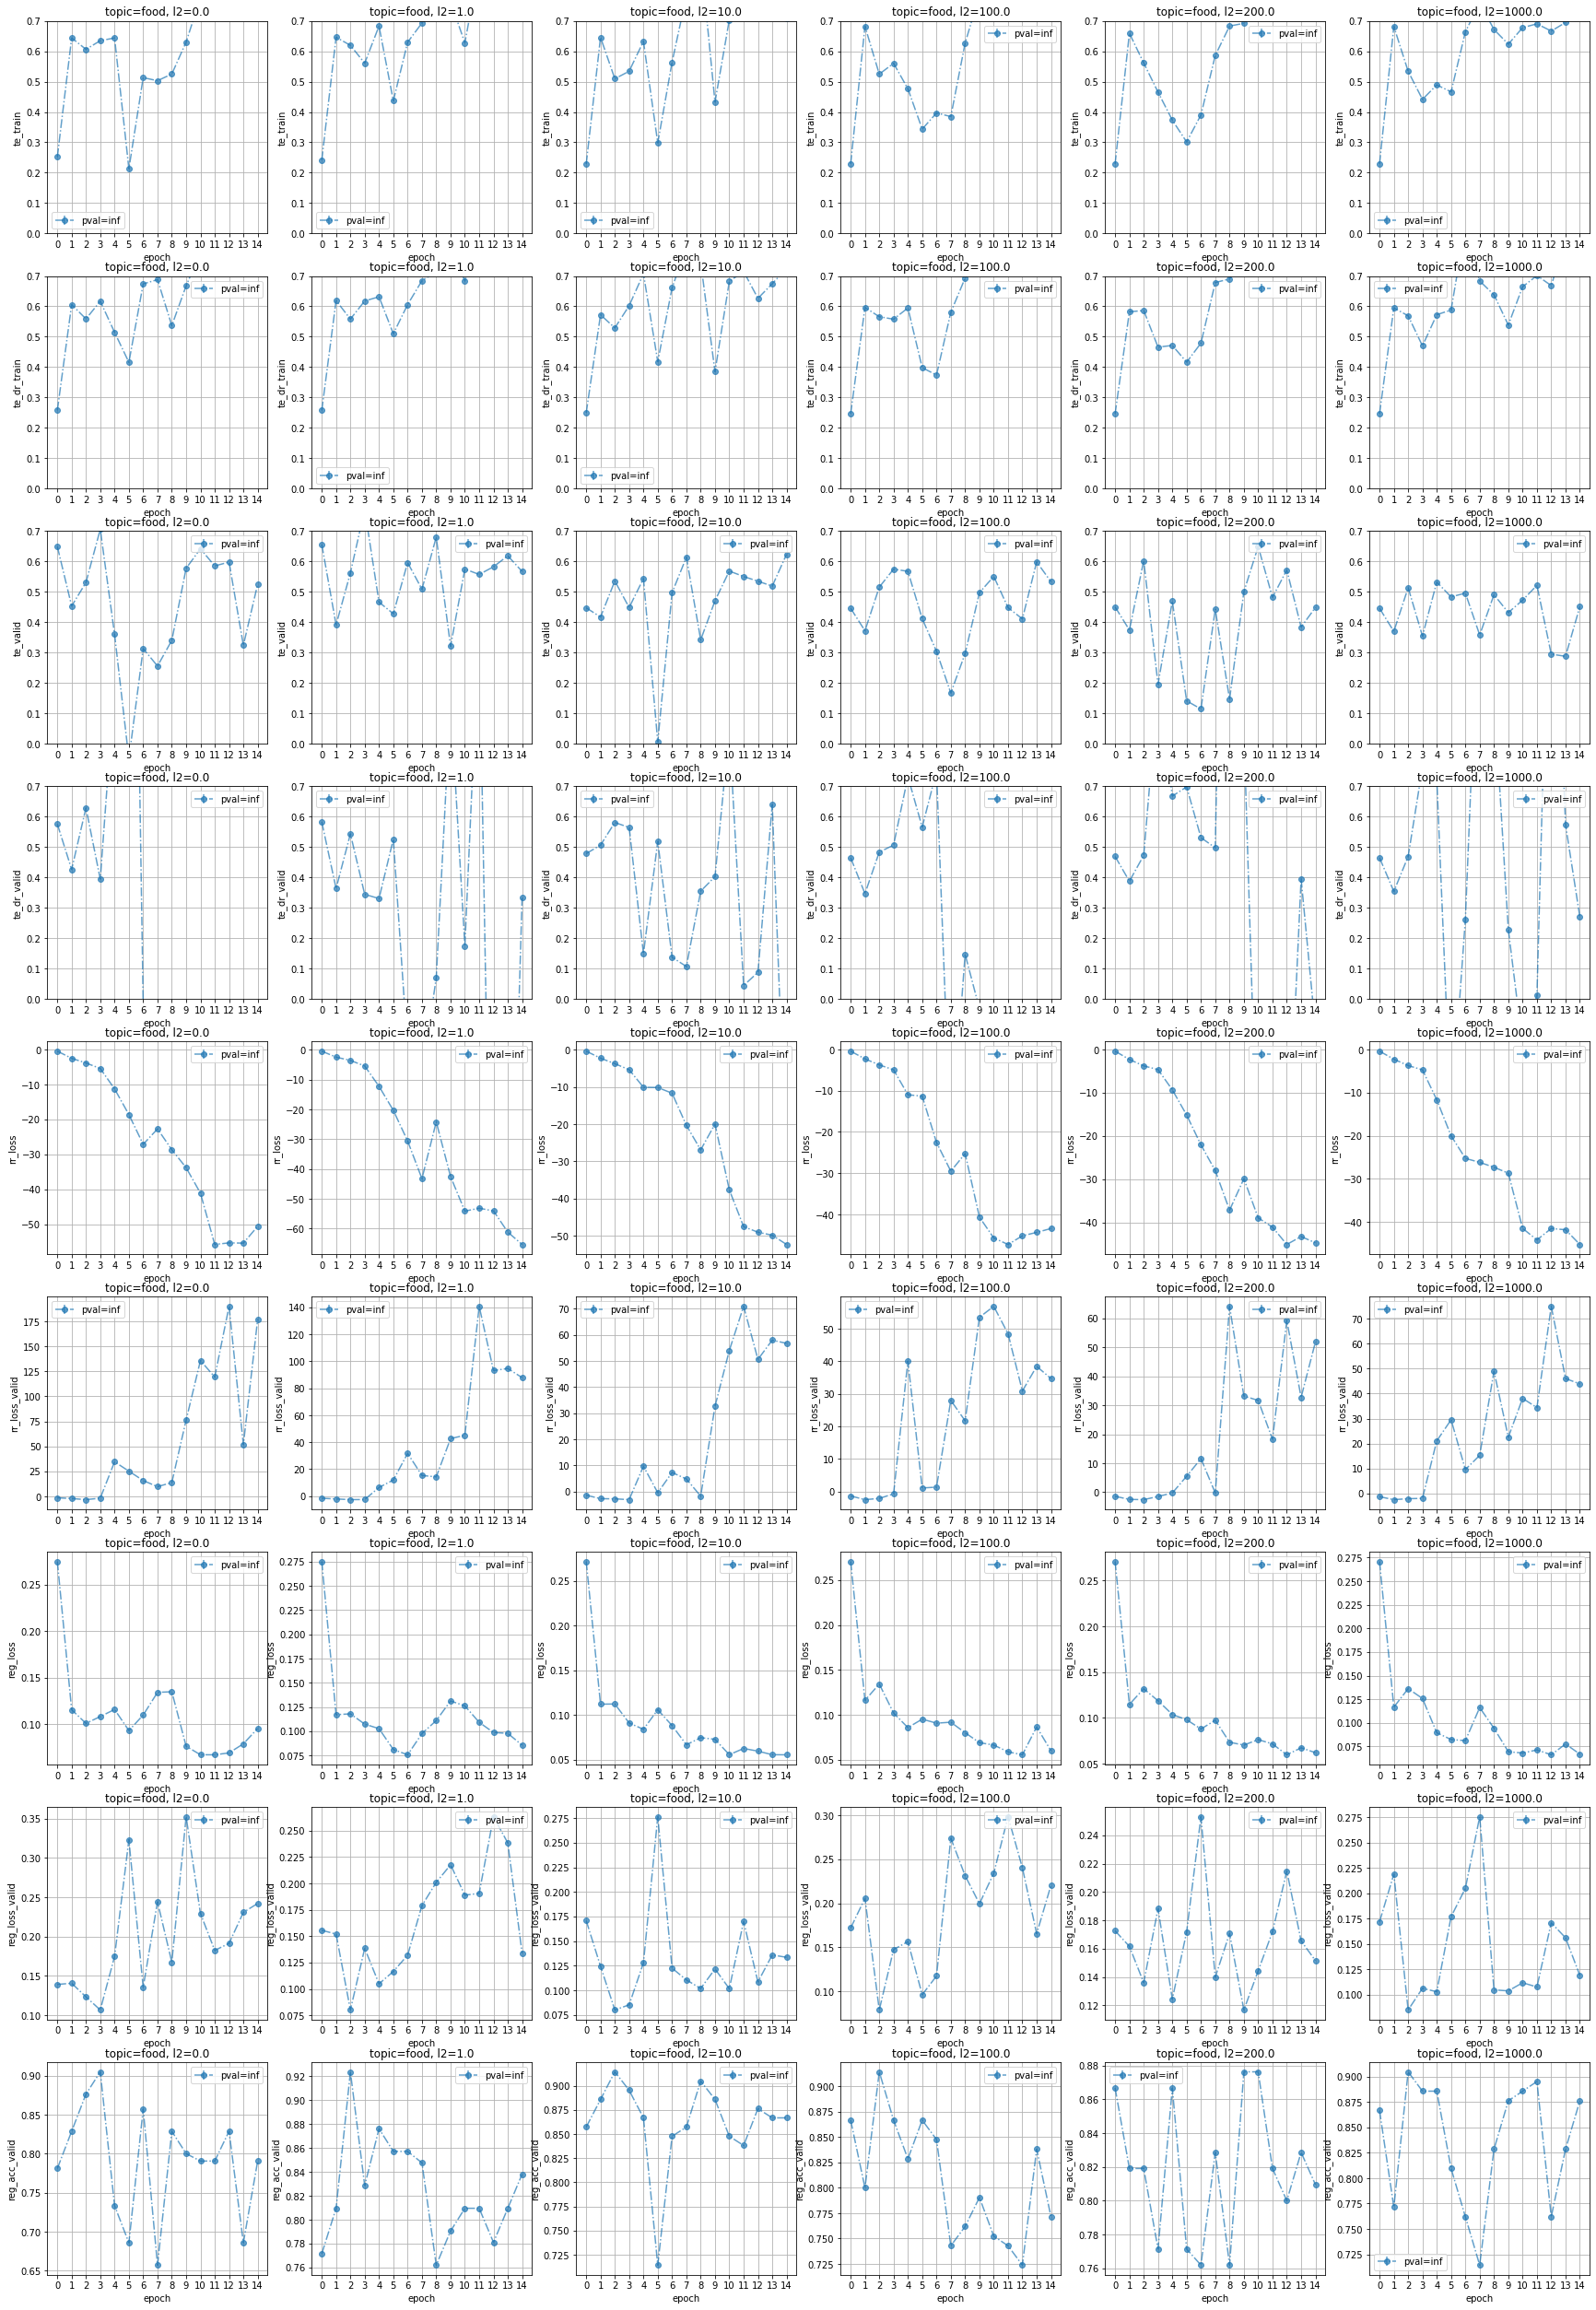

Bad pipe message: %s [b'\x1fbQ\xb2\xc6\xec\xfb\xe1']
Bad pipe message: %s [b'\x8d\xb3\xa2\xa6\xbc\x9e\xaa: \xb9#TO\xad\xdb\xc6}\xeb\x9c\xb0/\xe4U\x06\xa4\x0c\x1b\xec\x91h\xfd\xff\xac\xf0\xfb\xd3\xf2\xef\xe3X\xba\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \x10\xf0']
Bad pipe message: %s [b'<\xa1\x0c\x82;v\x7f-\xb4\x87\x1f\xc8\x85\x18z\xe7\xc7? $\t\xc4A\x134\x03a\xe7\xb5L\x01D{\xe7\xd1\x1c \x8eiO\x08\xd7\xf7\x8a@?\xc2[f\xafi\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x0

Bad pipe message: %s [b'3m\xe9\ru\x93\xc0']
Bad pipe message: %s [b';AkB\xf7C\xb8\x9fx \x94NF \xc9/\\x\x15\xf5\x03\x83\x86V\x03\xc1TB\x87\x02y6O\xc3\xcfm\xa9x`\xbc\xeaL\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.']
Bad pipe message: %s [b'1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03']
Bad pipe message: %s [b'\x08\x07\x08\x08\x08', b'\n\x08\x0b\x08\x04\x08\x05\x08']
Bad pipe message: %s [b'\x01\x05\x01\x06\x01']
Bad pipe message: %s [b"\xcb\x8c\xbf\xa5\x83\x97\xcar\x07\xe2\x1d\xd8\x8a\x07?\xed^\xf0\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0s\xc0w\x00\xc4\x00\xc3\xc0#\xc0'\x00g\x00@\xc0r\xc0v\x00\xbe\x00\xbd\xc0\n\xc0\x14\x009\x008\x00\

Bad pipe message: %s [b'\xbf9\x95\x8a\x89k\xcc\xa8q\x08>\x98\xaae \'\x1dw w\x0f\xa3fF\xa2A"(H\x87B5\xf4@\x14', b'\x01~.\xe5\xaa\xed\x8f\x82\x0e\xad\xec\xeb\x03\xe7\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \x93\xd9\x96\xbd,\x99_6\x8c\xef\xc0\x03zPqf\x8a\xf9@M\rl\xa9\x8d\xed']
Bad pipe message: %s [b'\x1d\x94\x8d\xb0i\xea\xfc\x97\xc7W\xb5\x0e\x94&\xe22\x80\n \x8b\x1bHTXp\xf8.k\xf7\x9e\xff\xb3r\xa0\xbf\xda\x15\xc0\xb1\xdb\xee\xe6\xf7q\xcd\xdb<\xde\xe7"w\x00\x08\x13\x02\x13\x03\x13\x01']
Bad pipe message: %s [b"\xde\x14P\x8b\x01I\x17\xbb\xd5\xfaWX\x84\x0c\xa6Fm\xe1\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f

In [65]:
run_list=[8,]
main_enum=20
hlayer=0

rr_lambda=1
reg_lambda=1
tmle_lambda=0
l2_lambda_list = [0.0, 1.0, 10.0, 100.0, 200.0, 1000.0]
# debug_tidx_list=[0,1]
topic_name="food"#["food","service","ambiance","noise"]
num_sample=500 #[1100,900,700,500]
debug_tidx=0


pval_list=["inf"]
# degree_confoundedness=0.0

noise=0.0

plot_item_list=[
            "te_train",
#             "te_corr_train",
            "te_dr_train",
            "te_valid",
#             "te_corr_valid",
            "te_dr_valid",
            "rr_loss",
            "rr_loss_valid",
            "reg_loss",
            "reg_loss_valid",
            "reg_acc_valid",
#             "reg_loss_all",
#             "reg_loss_all_valid",
#             "tmle_loss",
#             "l2_loss",
#             "alpha:tdtidx0-tcf0",
#             "alpha:tdtidx0-tcf1",
#             "alpha:tdtidx1-tcf0",
#             "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [5*len(l2_lambda_list), 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(l2_lambda_list))


for tidx,l2_lambda in enumerate(l2_lambda_list):
    fname_pattern= "dataset/cebab/nlp_logs/cad.cebabs1riesz.rnum({}).sample({}).hlayer({}).pval({}).dtidx({}).rr_lmd({}).reg_lmd({}).tmle_lmd({}).l2_lmd({}).dcf().noise({}).topic({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           pval_list=pval_list,
                           hlayer=hlayer,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           reg_lambda=reg_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda,
                           noise=noise,
                           topic_name=topic_name,
                           tidx=tidx,
                           plot_upto=15,
                           plot_per_idx=1,
                           replace_strategy=None,
    )

## Which expt is this

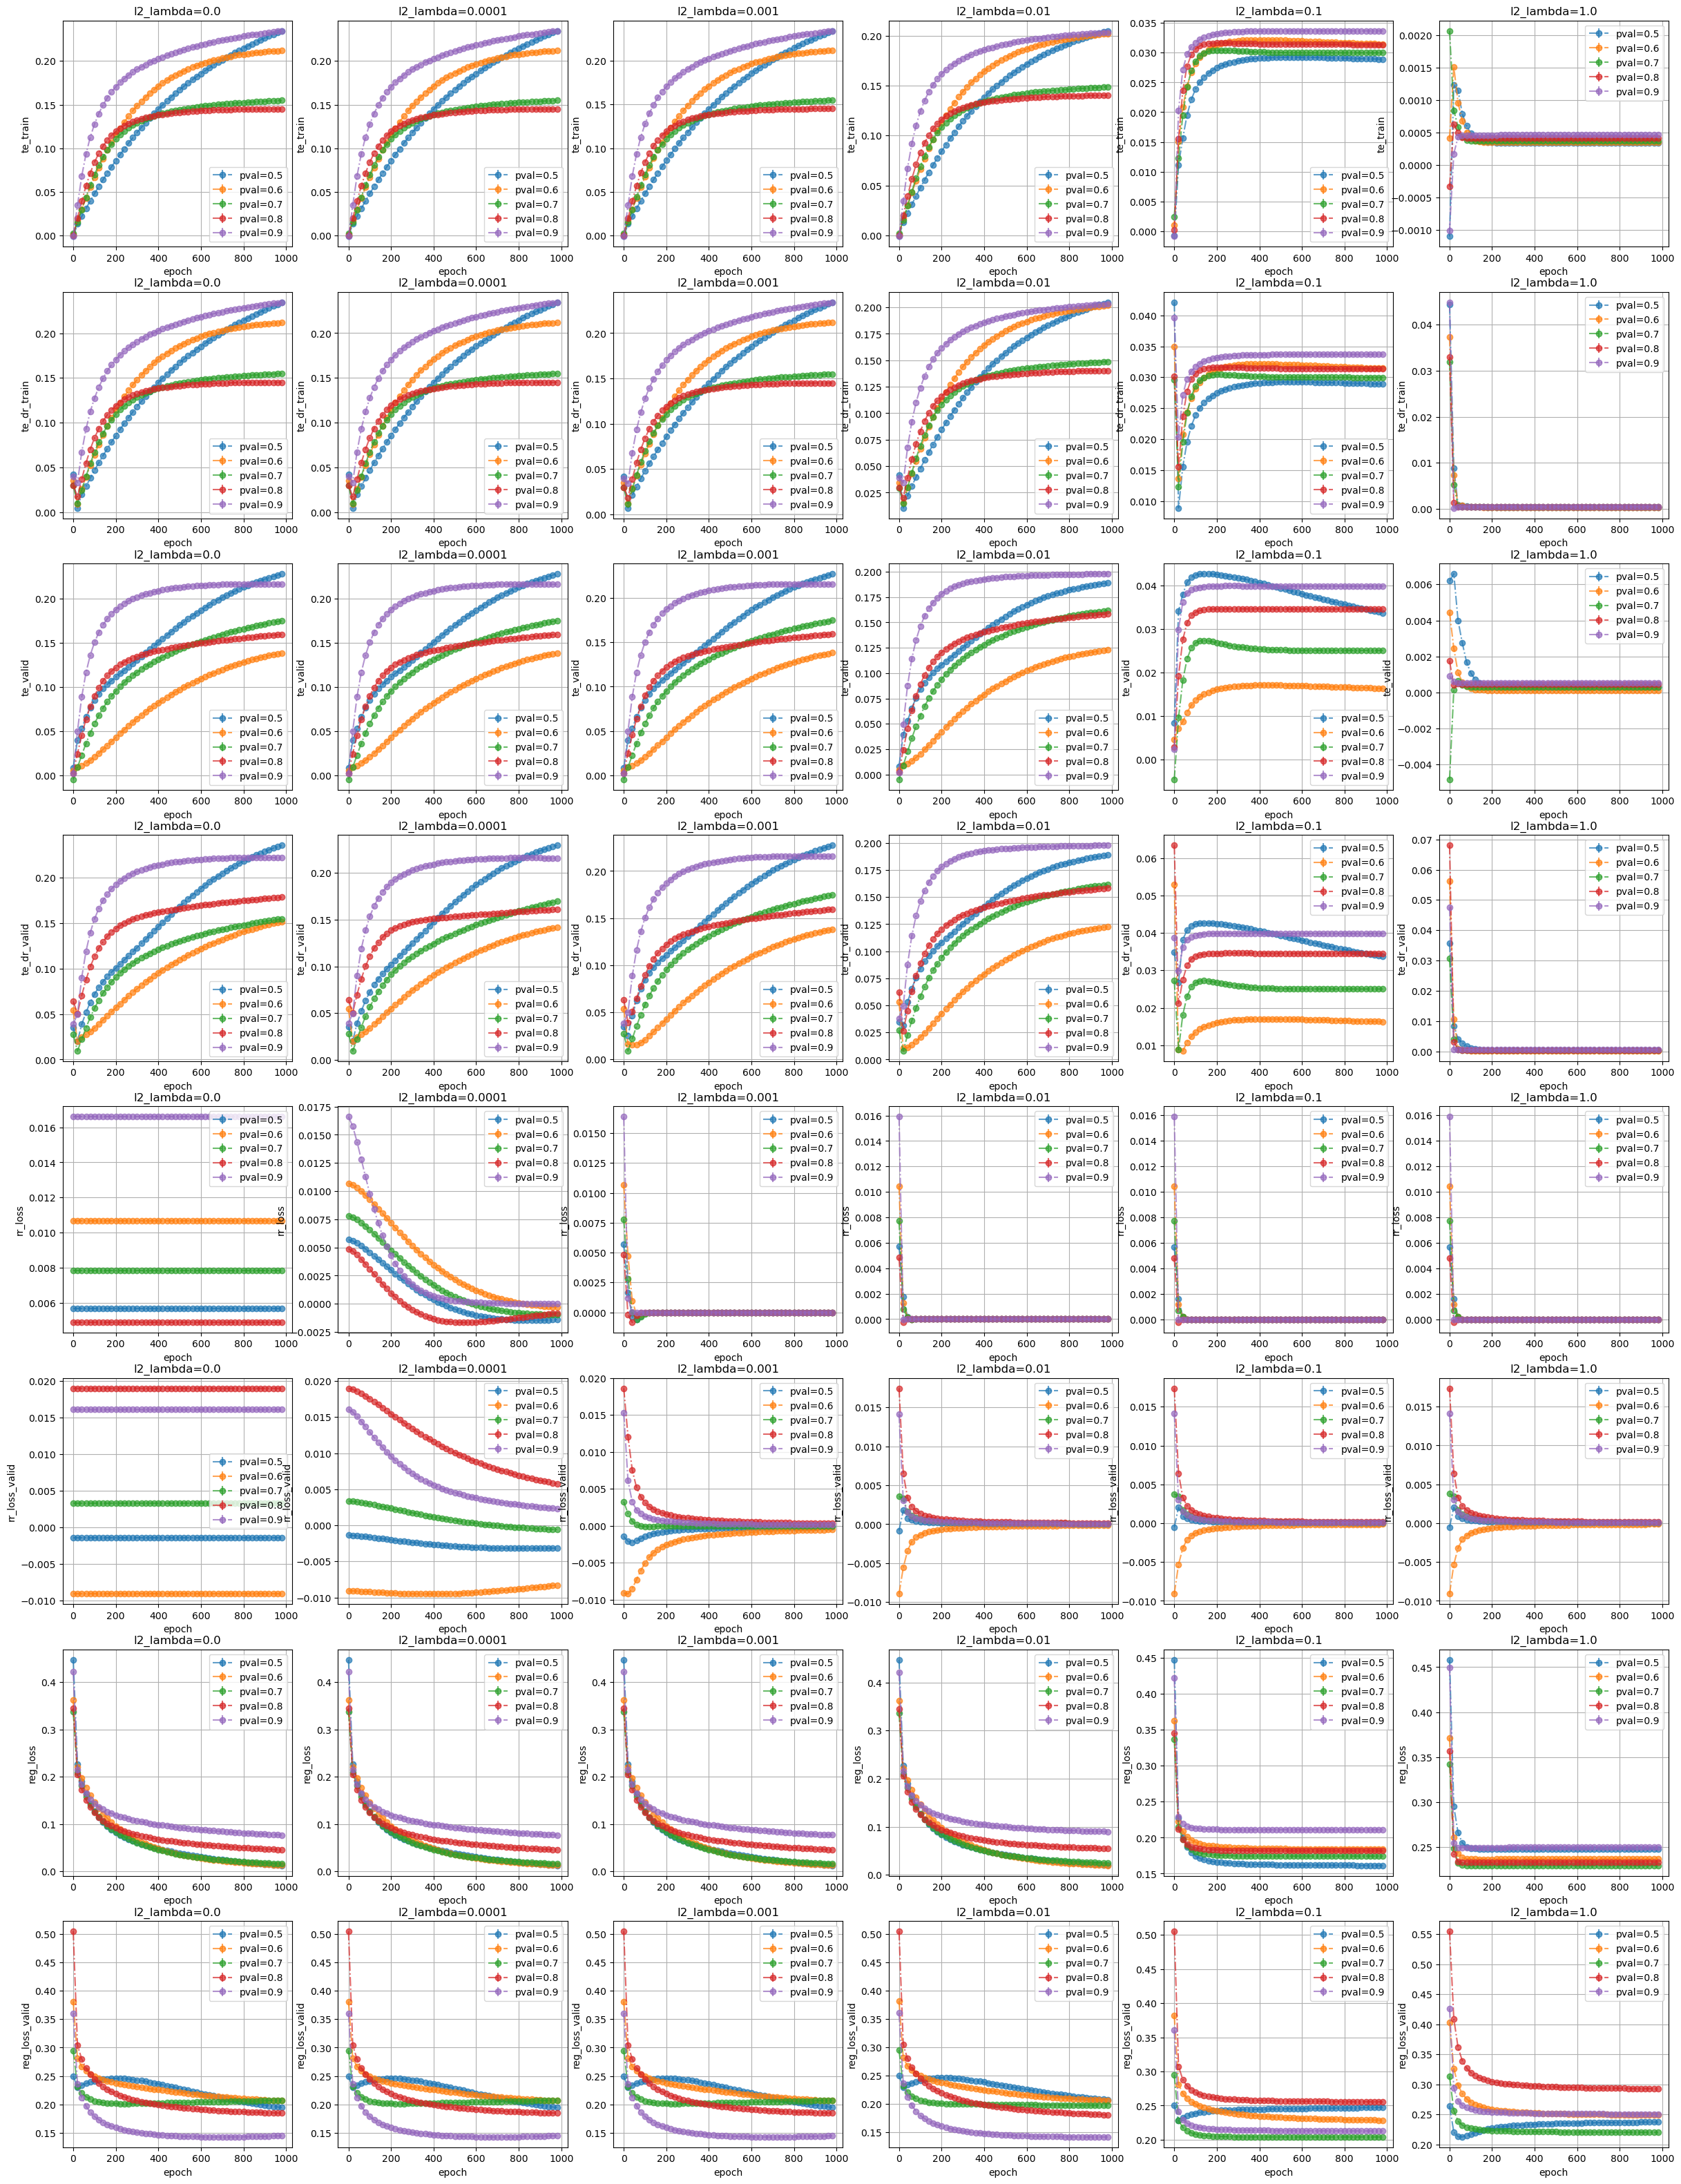

In [11]:
run_list=[4,]
main_enum=1000
hlayer=0

rr_lambda=0
reg_lambda=1
tmle_lambda=0
l2_lambda_list=[0.0,0.0001,0.001,0.01,0.1,1.0]#20.0,100.0,200.0,1000.0]
topic_name="food"
num_sample=350
debug_tidx=0

pval_list=[0.5,0.6,0.7,0.8,0.9]
noise=0.0

plot_item_list=[
            "te_train",
#             "te_corr_train",
            "te_dr_train",
            "te_valid",
#             "te_corr_valid",
            "te_dr_valid",
            "rr_loss",
            "rr_loss_valid",
            "reg_loss",
            "reg_loss_valid",
#             "tmle_loss",
#             "l2_loss",
#             "alpha:tdtidx0-tcf0",
#             "alpha:tdtidx0-tcf1",
#             "alpha:tdtidx1-tcf0",
#             "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [5*len(l2_lambda_list), 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(l2_lambda_list))


for lidx,l2_lambda in enumerate(l2_lambda_list):
    fname_pattern= "dataset/cebab/nlp_logs/cad.cebabs1riesz.rnum({}).sample({}).hlayer({}).pval({}).dtidx({}).rr_lmd({}).reg_lmd({}).tmle_lmd({}).l2_lmd({}).dcf().noise({}).topic({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           pval_list=pval_list,
                           hlayer=hlayer,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           reg_lambda=reg_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda,
                           noise=noise,
                           topic_name=topic_name,
                           tidx=lidx,
                           plot_upto=1000,
                           plot_per_idx=10,
    )

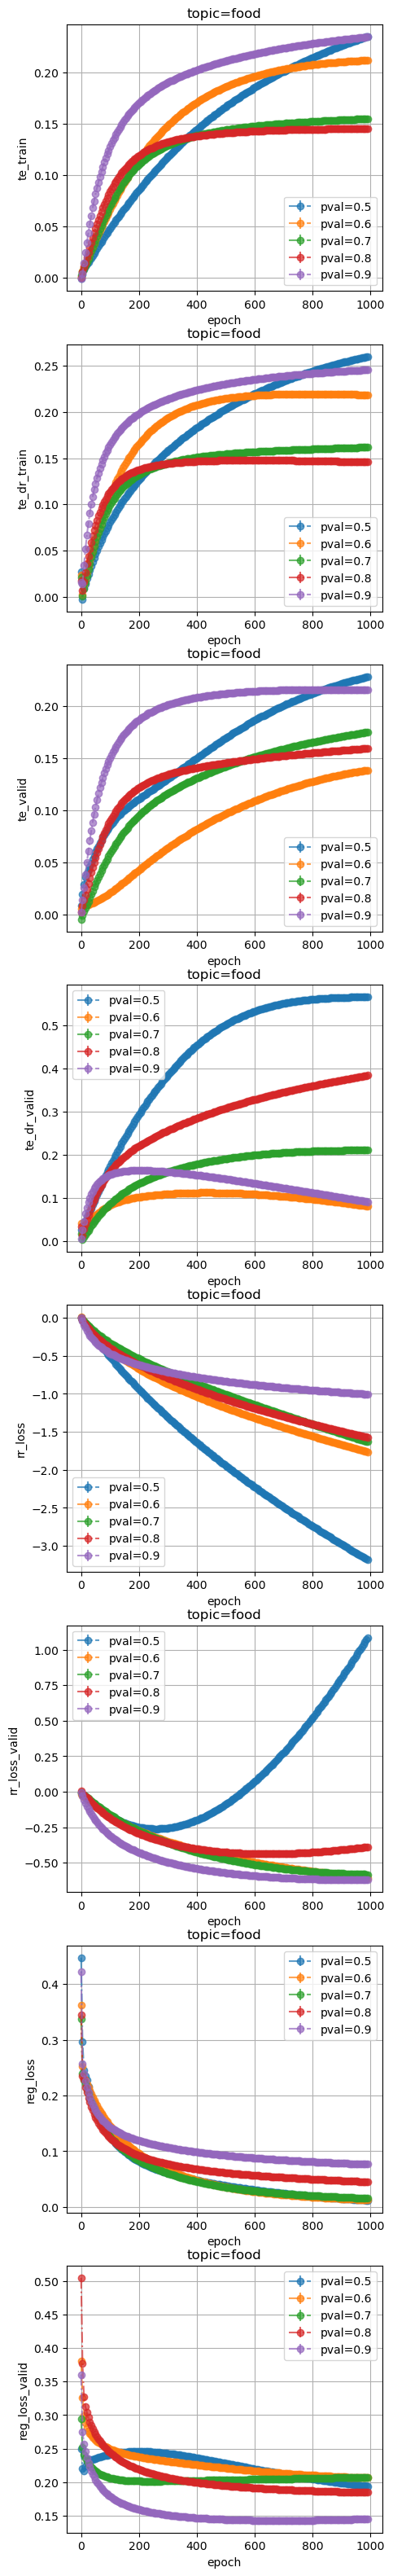

In [16]:
run_list=[4,]
main_enum=1000
hlayer=0

rr_lambda=1
reg_lambda=1
tmle_lambda=0
l2_lambda=0.0
# debug_tidx_list=[0,1]
topic_list=["food",]
num_sample_list=[350,]
debug_tidx=0

pval_list=[0.5,0.6,0.7,0.8,0.9]
# degree_confoundedness=0.0

noise=0.0

plot_item_list=[
            "te_train",
#             "te_corr_train",
            "te_dr_train",
            "te_valid",
#             "te_corr_valid",
            "te_dr_valid",
            "rr_loss",
            "rr_loss_valid",
            "reg_loss",
            "reg_loss_valid",
#             "tmle_loss",
#             "l2_loss",
#             "alpha:tdtidx0-tcf0",
#             "alpha:tdtidx0-tcf1",
#             "alpha:tdtidx1-tcf0",
#             "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [5, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(topic_list))

tidx=0
for topic_name,num_sample in zip(topic_list,num_sample_list):
    fname_pattern= "dataset/cebab/nlp_logs/cad.cebabs1riesz.rnum({}).sample({}).hlayer({}).pval({}).dtidx({}).rr_lmd({}).reg_lmd({}).tmle_lmd({}).l2_lmd({}).dcf().noise({}).topic({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           pval_list=pval_list,
                           hlayer=hlayer,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           reg_lambda=reg_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda,
                           noise=noise,
                           topic_name=topic_name,
                           tidx=tidx,
                           plot_upto=-1,
    )
    tidx+=1

# CivilComments Dataset

TypeError: plot_one_pval_TE_timeline() missing 1 required positional argument: 'replace_strategy'

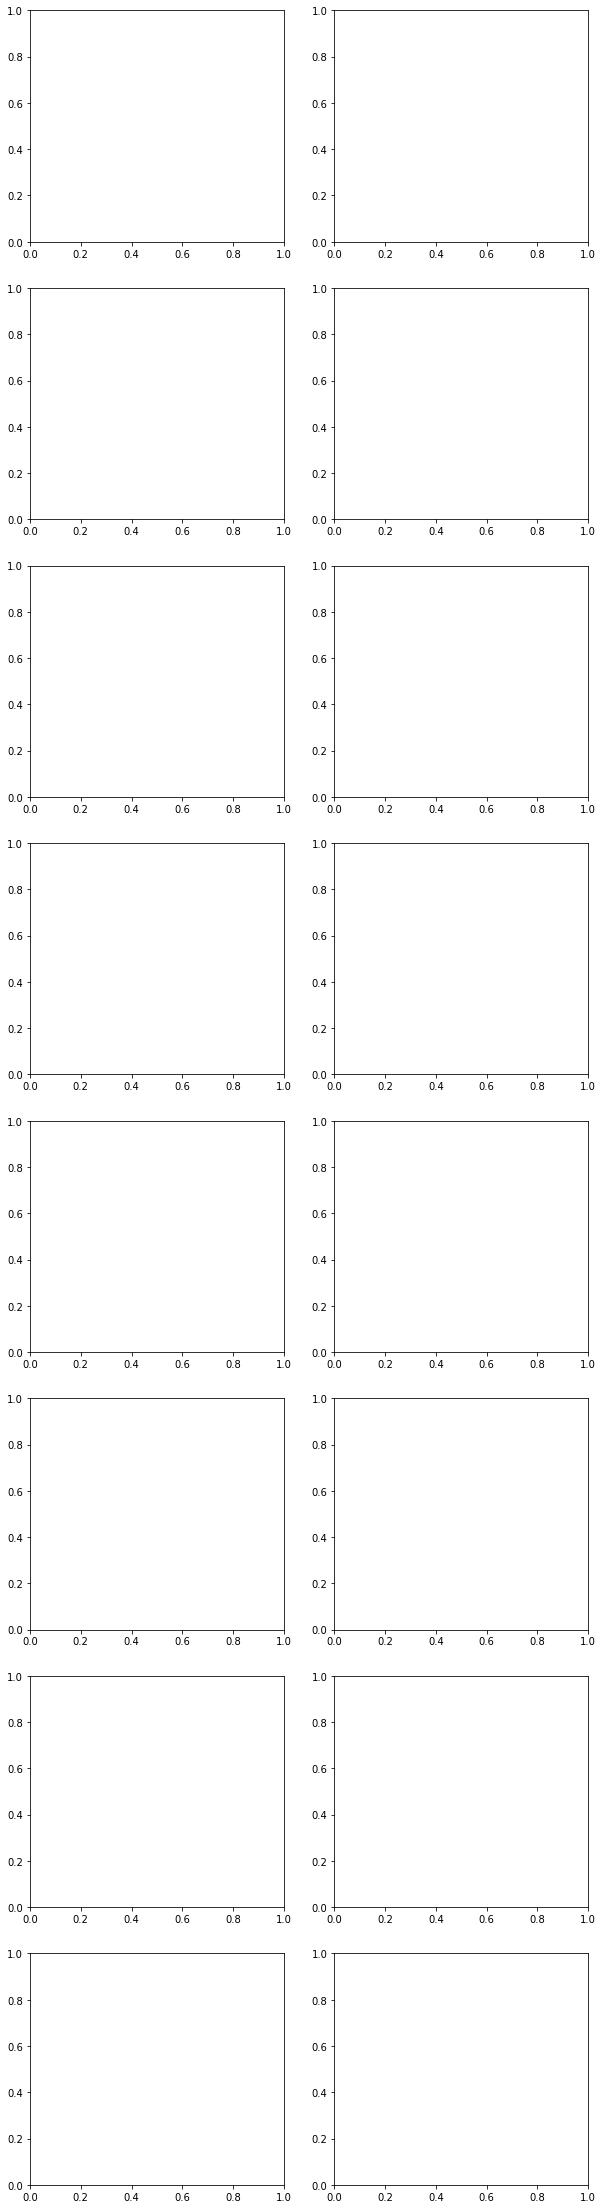

In [53]:
run_list=[8,]
main_enum=5
hlayer=0

rr_lambda=1
reg_lambda=1
tmle_lambda=0
l2_lambda_list=[0.0,0.0]
topic_name="race"
num_sample=5000
debug_tidx=0

pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
noise=0.0

plot_item_list=[
            "te_train",
#             "te_corr_train",
            "te_dr_train",
            "te_valid",
#             "te_corr_valid",
            "te_dr_valid",
            "rr_loss",
            "rr_loss_valid",
            "reg_loss",
            "reg_loss_valid",
#             "tmle_loss",
#             "l2_loss",
#             "alpha:tdtidx0-tcf0",
#             "alpha:tdtidx0-tcf1",
#             "alpha:tdtidx1-tcf0",
#             "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [5*len(l2_lambda_list), 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(l2_lambda_list))


for lidx,l2_lambda in enumerate(l2_lambda_list):
    fname_pattern= "dataset/civilcomments/nlp_logs/cad.civils1riesz.rnum({}).sample({}).hlayer({}).pval({}).dtidx({}).rr_lmd({}).reg_lmd({}).tmle_lmd({}).l2_lmd({}).dcf().noise({}).topic({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           pval_list=pval_list,
                           hlayer=hlayer,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           reg_lambda=reg_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda,
                           noise=noise,
                           topic_name=topic_name,
                           tidx=lidx,
                           plot_upto=20,
                           plot_per_idx=1,
    )

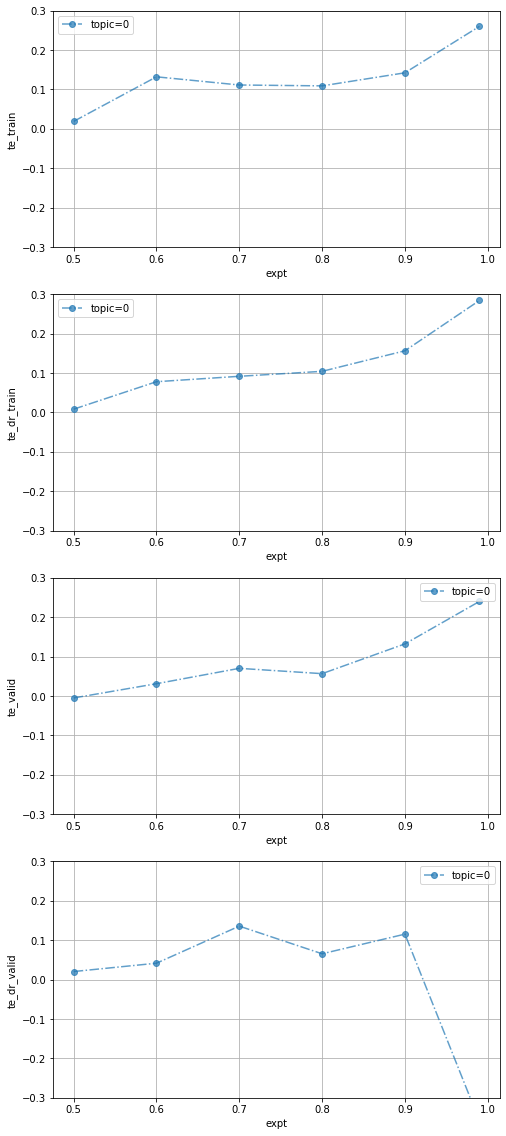

Bad pipe message: %s [b'\xffn\xf1\xa0T\xff\xe5H\x96\x9c\x02z\xc8\xf0:\x94G\xe6 \x11K_~=\xd0\x04\xe1\x0c\x9f4l?\x16\xde\xcd\xdbk\xa1y9r\x8bO\xd5\x80\xbb=\xe8u\xcdu\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08', b'\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \x16\xde\xf2\x16RBS\x82L\x0b\xee\xd9k?]0\xaf\xf7\xc9\xeb\xe7|']
Bad pipe message: %s [b'\xc7\x00\x08>\xe9@\xc1\xb4&\xbb\xeak-H\x8f\xb2\xe3F \xffS\xb2\x9d7\xdfqg\x1e\xdb\x83\xa8Q\x18F\x8f\xb11', b'\x891&\x8dx\xcf\x04\x82\xc3\xa4R\xf6\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\

Bad pipe message: %s [b"\x919\x0evp\xb2\xdc\xcb4\r\xbd\x7f\xe2\xb3\xe4\x12\xdf: \xdb|'\x84\xc54jj?\xb9LB~.\xc6\x91\x1a\xfb\xd3\xb4\x94\xe9\x1f\xd4J\x9d3\xf8/\xf0\x94\xa1\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00", b'\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05']
Bad pipe message: %s [b'\x03\x08']
Bad pipe message: %s [b'\x08\x08\t\x08\n\x08']
Bad pipe message: %s [b'\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \xe3+\x95\x9b\x18\xd9\xbb\x9b\x97%+\x81\xa1I\x1f\x12\xe4\xfc\x94\xcc\xb5\xc8']
Bad pipe message: %s [b"}\xf3\xbdRv!\x06\xda\xe6\xd5\x93-\\[Q\xa34\x13\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\x

In [31]:
run_list=[8,]
# main_enum=2
hlayer=0

rr_lambda=1
reg_lambda=1
tmle_lambda=0
# l2_lambda_list=[0.0,0.0]
l2_lambda=0.0
topic_name="gender"
num_sample=5000
debug_tidx=0

pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
noise=0.0

plot_item_list=[
            "te_train",
#             "te_corr_train",
            "te_dr_train",
            "te_valid",
#             "te_corr_valid",
            "te_dr_valid",
#             "rr_loss",
#             "rr_loss_valid",
#             "reg_loss",
#             "reg_loss_valid",
#             "tmle_loss",
#             "l2_loss",
#             "alpha:tdtidx0-tcf0",
#             "alpha:tdtidx0-tcf1",
#             "alpha:tdtidx1-tcf0",
#             "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [8,5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list))


# for lidx,l2_lambda in enumerate(l2_lambda_list):
fname_pattern= "dataset/civilcomments/nlp_logs/cad.civils1riesz.rnum({}).sample({}).hlayer({}).pval({}).dtidx({}).rr_lmd({}).reg_lmd({}).tmle_lmd({}).l2_lmd({}).dcf().noise({}).topic({})/probe_metric_list.json"
plot_one_pval_TE_final(ax=ax,
                       run_list=run_list,
                       num_sample=num_sample,
                       pval_list=pval_list,
                       hlayer=hlayer,
                       main_enum=main_enum,
                       fname_pattern=fname_pattern,
                       debug_tidx=debug_tidx,
                       rr_lambda=rr_lambda,
                       reg_lambda=reg_lambda,
                       tmle_lambda=tmle_lambda,
                       l2_lambda=l2_lambda,
                       noise=noise,
                       topic_name=topic_name,
                       tidx=lidx,
                       plot_upto=20,
                       plot_per_idx=1,
)

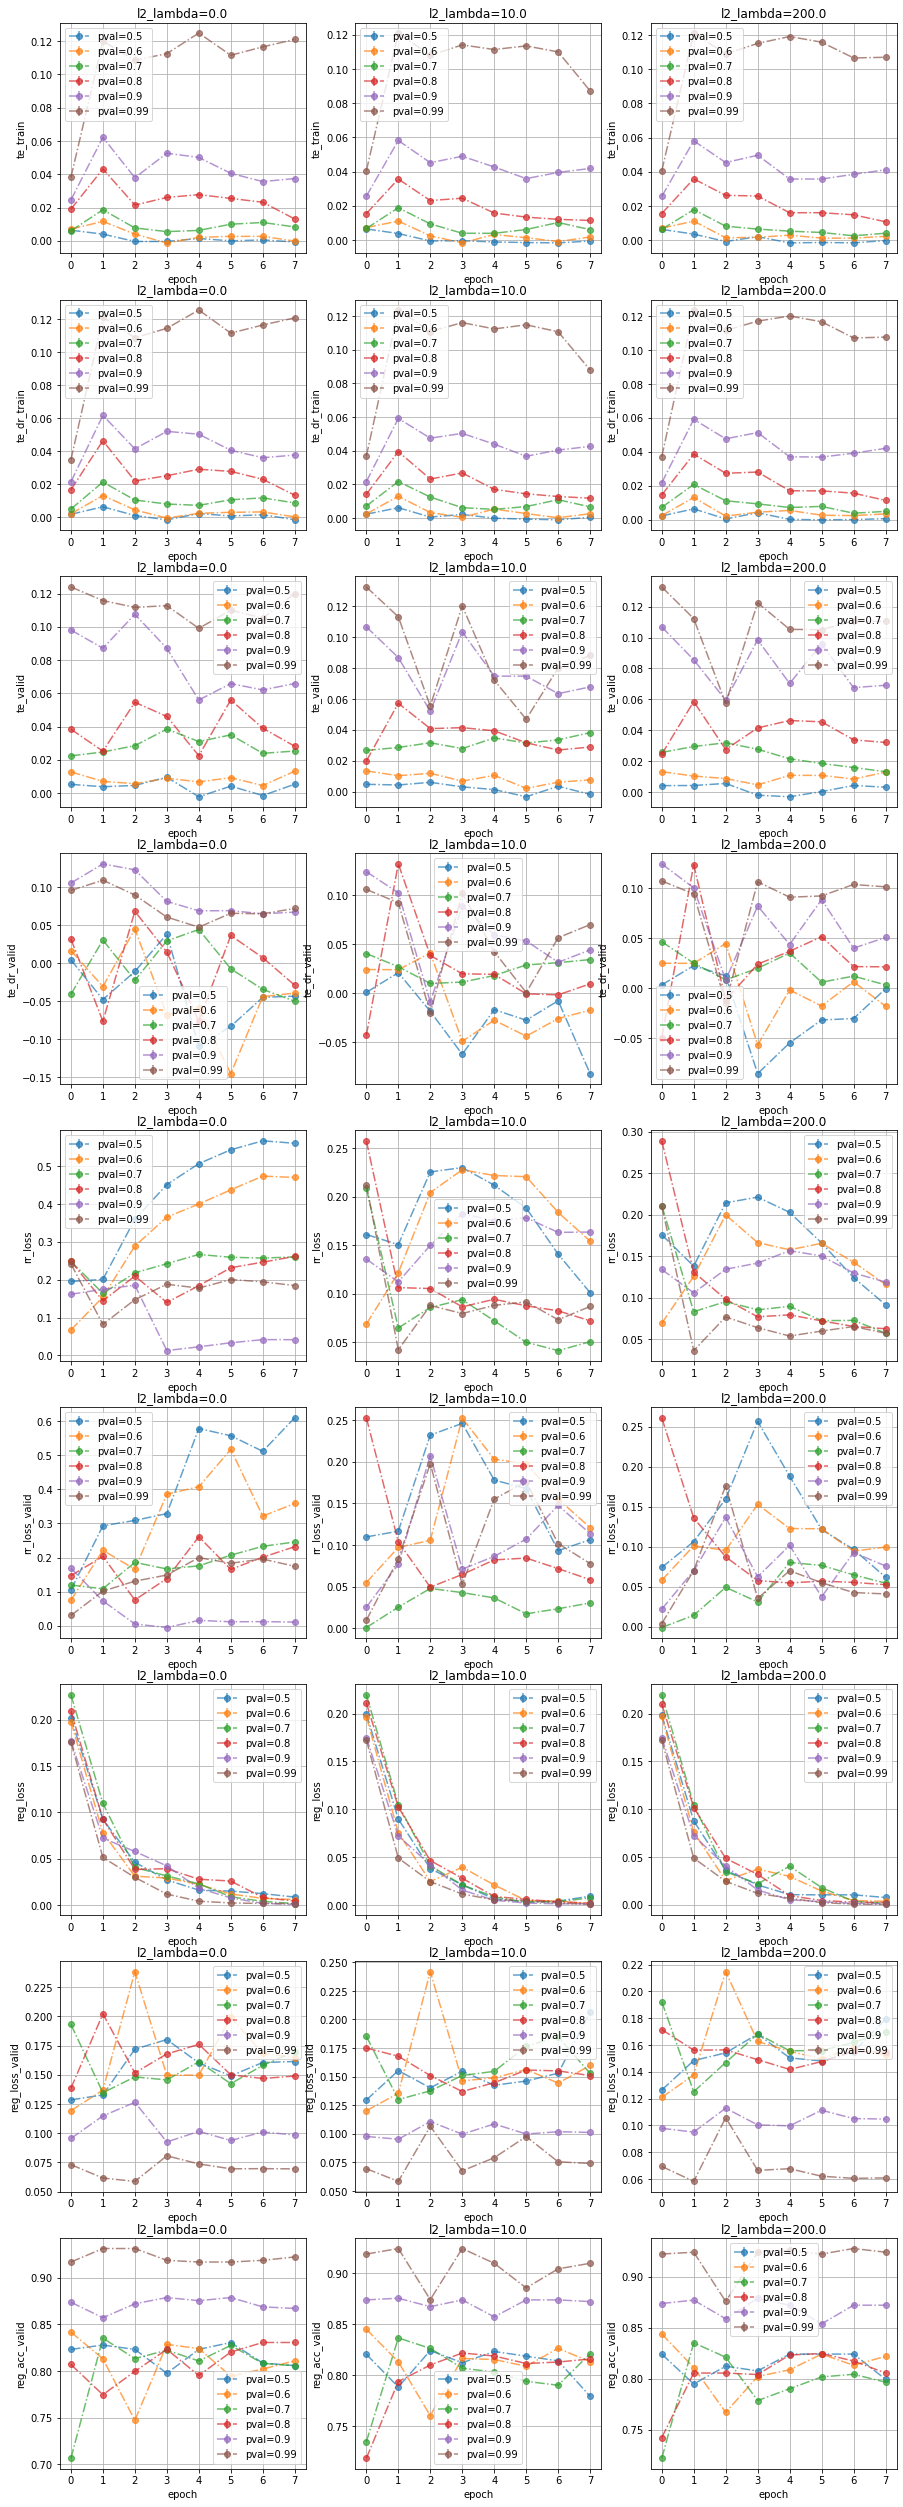

Bad pipe message: %s [b'\x8d\xc6\x0c\x8f\xb7\xe9\x8a\xd3#\xb7\xd6\rB\xcb\xec\x7f\xfb\x81 \n\xaf\xfb\n\x1a#\xd1\xed<n\xe2\xea\xe2\x98\xc6\x9a\x1c\xc1U\xa3\xb9\x07r\x1fo/\xf8\x03+@\x02\xb3\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00']
Bad pipe message: %s [b'\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08']
Bad pipe message: %s [b'\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\xfb\x8a{\xd7t\x9b.\xce\xfd\xdb\xa5\xa9\xe7@\x98#lC \xe2"{\xfb']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \x9e\xc8}y*,a\xaf\xd6\x00\xc0%\xec\x93\x80\xc9\x96\x7f\xc5\xe37\x94']
Bad pipe message: %s [b'y']
Bad pipe message: %s [b'A~W\xd7v*\x1d/]\xb6\x9bUt9\xa7\x81\xf7d\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\x

In [23]:
run_list=[8,]
main_enum=5
hlayer=0

rr_lambda=0
reg_lambda=1
tmle_lambda=0
l2_lambda_list=[0.0,10.0,200.0]
topic_name="gender"
num_sample=5000
debug_tidx=0
replace_strategy="remove"

pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
noise=0.0

plot_item_list=[
            "te_train",
#             "te_corr_train",
            "te_dr_train",
            "te_valid",
#             "te_corr_valid",
            "te_dr_valid",
            "rr_loss",
            "rr_loss_valid",
            "reg_loss",
            "reg_loss_valid",
            "reg_acc_valid",
#             "tmle_loss",
#             "l2_loss",
#             "alpha:tdtidx0-tcf0",
#             "alpha:tdtidx0-tcf1",
#             "alpha:tdtidx1-tcf0",
#             "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [5*len(l2_lambda_list), 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(l2_lambda_list))


for lidx,l2_lambda in enumerate(l2_lambda_list):
    fname_pattern= "dataset/civilcomments/nlp_logs/cad.civils1riesz.rnum({}).sample({}).hlayer({}).pval({}).dtidx({}).rr_lmd({}).reg_lmd({}).tmle_lmd({}).l2_lmd({}).dcf().noise({}).topic({}).replace_strategy({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           pval_list=pval_list,
                           hlayer=hlayer,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           reg_lambda=reg_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda,
                           noise=noise,
                           topic_name=topic_name,
                           tidx=lidx,
                           plot_upto=20,
                           plot_per_idx=1,
                           replace_strategy=replace_strategy,
    )